# 2019-08-12 Pancreas data for fig 3
# Bob's new curated cells, no prior annotation

In [680]:
import pandas as pd
import numpy as np
import loompy

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import matplotlib as mpl
import imp
import sys

sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
import semiAnnotate_main as sam
import semiAnnotate_Sankey as sank
import semiAnnotate_dotplot as sdot
import get_timestamp as time

In [681]:
# load data
# Bob Jones Tumor Pancreas dataset (to be annotated)
TuPa_count_path = '../leidenalg/Datasets/TuPaMetaDataDivya/CuratedTumorCountTable.csv'
TuPa_counttable = pd.read_csv(TuPa_count_path,index_col=0)
TuPa_meta = pd.read_csv('../leidenalg/Datasets/TuPaMetaDataDivya/CuratedTumorMetaData.csv',sep=',',index_col=0)
tsne_coords  = pd.read_csv('../leidenalg/Datasets/TuPaMetaDataDivya/CuratedTumorTSNECoordinates.csv',index_col=0)
TuPa_meta = TuPa_meta.join(tsne_coords)

# switch index from ENSG number to gene name 
translate = pd.read_csv('../leidenalg/Datasets/mart_export.txt',sep='\t')
lut = dict(zip(translate['Gene stable ID'],translate['Gene name']))
TuPa_counttable.rename(index=lut,columns=str,inplace=True)
#  Pancreas data (adult aging to be used as atlas)
AA_count_path = '../leidenalg/Datasets/AdultAgingPancForCIRM/AdultAgeingCountTable.csv'
AA_counttable = pd.read_csv(AA_count_path,index_col=0)
AA_meta = pd.read_csv('../leidenalg/Datasets/AdultAgingPancForCIRM/pancreas_adult_annotation_table.csv')
AA_meta['idx'] = 'X'+AA_meta['c1_chip_id'].astype(str)+'.'+AA_meta['capture_position']
AA_meta.set_index('idx',inplace=True)

AAtsne = pd.read_csv('../leidenalg/Datasets/AdultAgingPancForCIRM/AdultAgeingTSNETable.csv',sep=',')
AAtsne.set_index(AAtsne['Unnamed: 0'].str[1:],inplace=True)
AAtsne.index = 'X'+AAtsne.index
AAtsne.rename(index=str,columns={'Unnamed: 1': 'Dim1','Unnamed: 2':'Dim2'},inplace=True)
AA_meta = AA_meta.join(AAtsne[['Dim1','Dim2','celltypes']],how='inner')
AA_meta.dropna(how='all',axis=1,inplace=True)

# get rid of tumor samples with extremely low cell count (low quality)
print(len(TuPa_meta))
dropout_tumors = TuPa_meta['Tumor'].value_counts()[(TuPa_meta['Tumor'].value_counts()<10)].index
dropout_cells = TuPa_meta[TuPa_meta['Tumor'].isin(dropouts)].index
TuPa_counttable.drop(dropout_cells,axis=1,inplace=True)
TuPa_meta = TuPa_meta[~TuPa_meta['Tumor'].isin(dropouts)]
print(len(TuPa_meta))

TuPa_meta['celltypes'] = np.nan
#TuPa_meta.rename(index=str, columns={'annotation':'celltypes'},inplace=True) # this is when annotations are present

AA_newmeta = AA_meta[AA_meta['celltypes']!='unsure'].copy()
len(AA_newmeta)

1807
1795


2280

In [560]:
#AA_counttable
#AA_meta

In [248]:
savedir = '../leidenalg/Datasets/Pancreas/'
print(len(AA_meta))
print(AA_meta.celltypes.value_counts())
print(TuPa_meta.Tumor.value_counts())

2542
alpha          998
acinar         411
ductal         389
beta           347
unsure         262
delta           82
mesenchymal     53
Name: celltypes, dtype: int64
TuPa23    520
TuPa28    346
TuPa31    257
TuPa29    187
NuPa22    173
TuPa1     110
TuPa27     68
TuPa2      48
TuPa5      30
TuPa3      22
TuPa6      18
TuPa4      16
Name: Tumor, dtype: int64


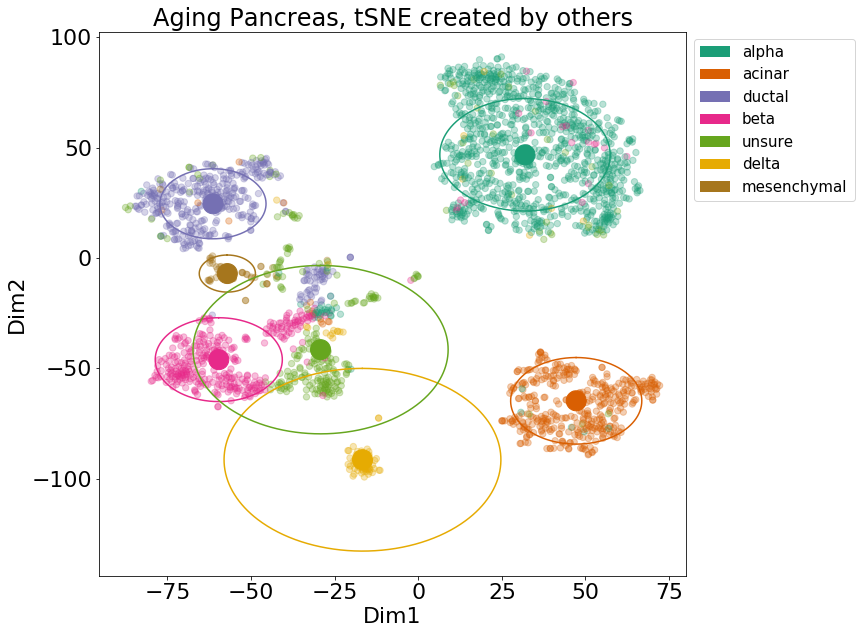

In [726]:
keys = list(AA_meta.celltypes.value_counts().index); values = sns.color_palette('Dark2',len(keys))
lut = dict(zip(keys,values))
colors = AA_meta.celltypes.map(lut)

medians = AA_meta.groupby('celltypes').median()[['Dim1','Dim2']]
stds = AA_meta.groupby('celltypes').std()[['Dim1','Dim2']]

def circle(x,y,r):
    t = np.arange(0,2*np.pi,.01)
    cx = x+r*np.sin(t)
    cy = y+r*np.cos(t)
    return(cx,cy)

f = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
AA_meta.plot.scatter('Dim1','Dim2',ax=ax,color=colors,s=40,alpha=.3)#,label=colors.keys)
medians.plot.scatter('Dim1','Dim2',ax=ax,color=medians.index.map(lut),s=400,alpha=1)
for group in stds.index:
    R = stds.max(axis=1).loc[group]
    info = medians.loc[group]
    if group=='beta':
        R=19
    x,y = circle(info['Dim1'],info['Dim2'],R)
    ax.plot(x,y,color=lut[group],label=None)

for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
#plt.yticks([]);plt.xticks([])
plt.title('Aging Pancreas, tSNE created by others')
plt.gcf().subplots_adjust(left=.05,right=0.73)
plt.show()
f.savefig(savedir+'Atlas_tSNE_cellTypes_nounsure.png')


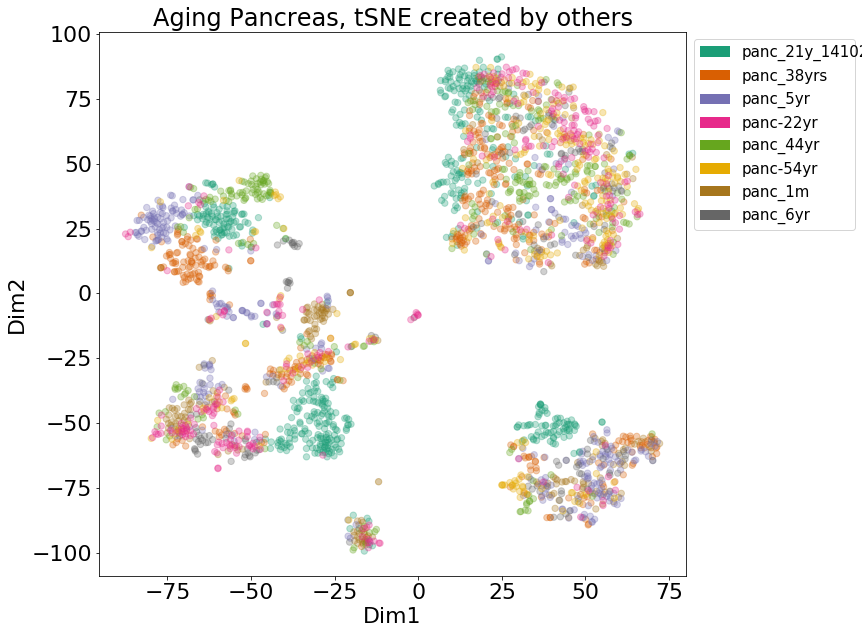

In [725]:
keys = list(AA_meta['experiment_name'].value_counts().index); values = sns.color_palette('Dark2',len(keys))
lut2 = dict(zip(keys,values))
colors = AA_meta['experiment_name'].map(lut2)


f = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
AA_meta.plot.scatter('Dim1','Dim2',ax=ax,color=colors,s=40,alpha=.3)#,label=colors.keys)
medians.plot.scatter('Dim1','Dim2',ax=ax,color=medians.index.map(lut),s=400,alpha=1)

for x,y in lut2.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
#plt.yticks([]);plt.xticks([])
plt.title('Aging Pancreas, tSNE created by others')
plt.gcf().subplots_adjust(left=.05,right=0.73)
plt.show()
f.savefig(savedir+'Atlas_tSNE_experimentName_nounsure.png')


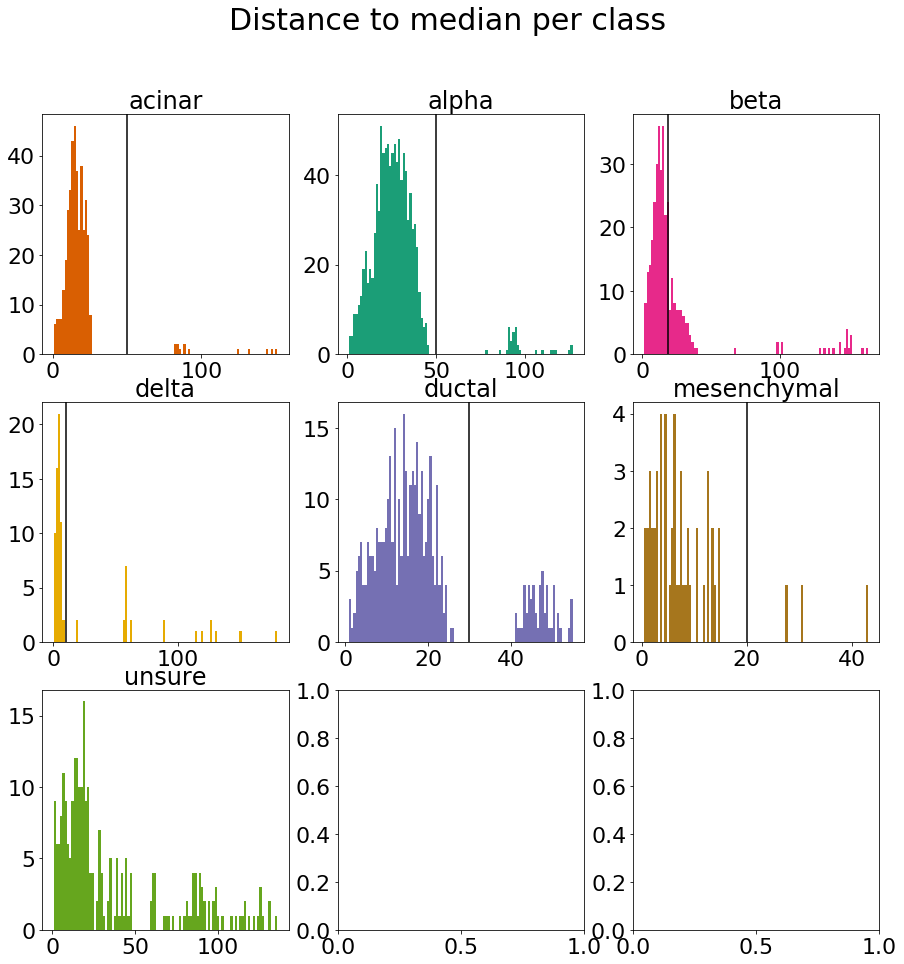

In [727]:
def distance_calc(p1,p2):
    x1 = p1[0];y1 = p1[1]
    x2 = p2[0];y2 = p2[1]
    dist = np.sqrt((x2-x1)**2+(y2-y1)**2)
    return dist
i=0
cutoffs = [50,50,19,10,30,20]
f,ax=plt.subplots(3,3,figsize=(15,15))
ax = ax.ravel()
for celltype in np.sort(AA_meta['celltypes'].unique()):
    p1 = list(medians.loc[celltype])
    for cell in AA_meta[AA_meta['celltypes']==celltype].index:
        p2 = list(AA_meta.loc[cell,['Dim1','Dim2']])
        AA_meta.loc[cell,'dist_to_class_median'] = distance_calc(p1,p2)
    idx = AA_meta[AA_meta['celltypes']==celltype].index
    if i<6:
        AA_meta.loc[idx,'radius_annot'] = [celltype if f<cutoffs[i] else 'outcast' for f in AA_meta.loc[idx,'dist_to_class_median']]
    ax[i].hist(AA_meta.loc[idx,'dist_to_class_median'],100,color=lut[celltype])
    if i<6:
        ax[i].axvline(cutoffs[i],c='k')
    """ if celltype=='beta':
        ax[i].set_xscale('log')"""
    ax[i].set_title(celltype)
    i+=1
plt.suptitle('Distance to median per class')
f.savefig('../leidenalg/Datasets/AdultAgingPancForCIRM/distance_to_median_celltypes.png')

In [537]:
#AA_meta.loc[AA_meta[(np.abs(AA_meta['Dim1'])<5)].index,'man_annot']

X1000010015.G09      alpha
X1000102202.B7         NaN
X1000102801.C12        NaN
X1000102801.G2     outcast
X1000102803.C5         NaN
X1000102803.C6         NaN
X1000102803.F11        NaN
X1000102803.F8         NaN
Name: man_annot, dtype: object

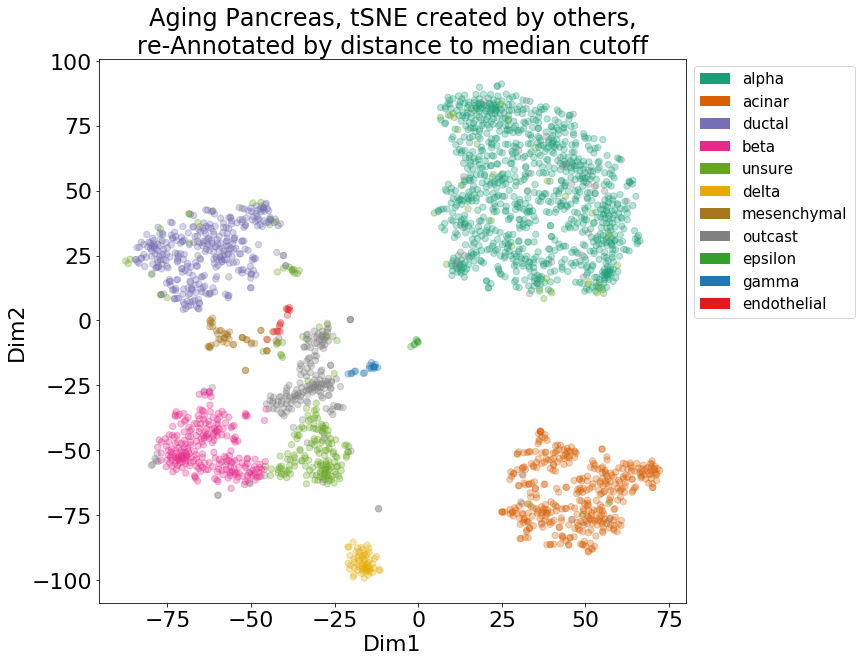

In [728]:
lut['outcast'] = 'gray'
lut['epsilon'] = sns.color_palette('Paired',len(keys)+3)[3]
lut['gamma'] = sns.color_palette('Paired',len(keys)+3)[1]
lut['endothelial'] = sns.color_palette('Paired',len(keys)+3)[5]
AA_meta['man_annot'] = AA_meta['radius_annot']
AA_meta.loc[AA_meta[(np.abs(AA_meta['Dim1'])<5)].index,'man_annot'] = 'epsilon'
AA_meta.loc[AA_meta[(AA_meta['celltypes']=='unsure')&(AA_meta['Dim1']<-35)&(AA_meta['Dim1']>-50)&(AA_meta['Dim2']>-8
                                                                                                 )&(AA_meta['Dim2']<10)].index,'man_annot'] = 'endothelial'
AA_meta.loc[AA_meta[(AA_meta['Dim1']<-5)&(AA_meta['Dim1']>-22)&(AA_meta['Dim2']<-5)&(AA_meta['Dim2']>-25)].index,'man_annot'] = 'gamma'
colors = AA_meta['man_annot'].fillna('unsure').map(lut)

f = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
AA_meta.plot.scatter('Dim1','Dim2',ax=ax,color=colors,s=40,alpha=.3)#,label=colors.keys)
#medians.plot.scatter('Dim1','Dim2',ax=ax,color=medians.index.map(lut),s=400,alpha=1)

for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
#plt.yticks([]);plt.xticks([])
plt.title('Aging Pancreas, tSNE created by others,\nre-Annotated by distance to median cutoff')
plt.gcf().subplots_adjust(left=.05,right=0.73)
plt.show()
f.savefig(savedir+'Atlas_tSNE_cellTypes_reAnnotRadius_andManual.png')


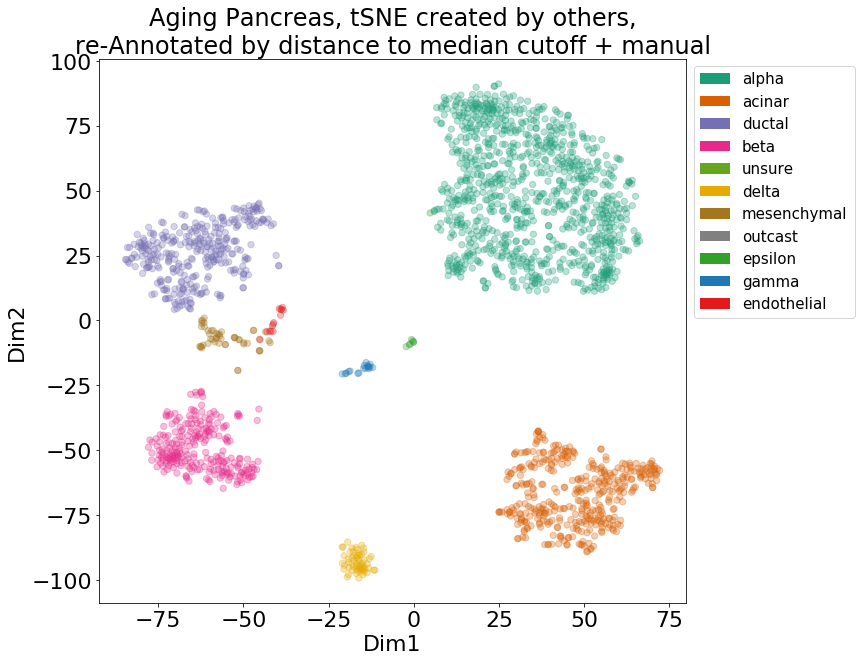

In [729]:
tmp = AA_meta[(AA_meta['man_annot']!='outcast')&(~AA_meta['man_annot'].isna())]
colors = tmp['man_annot'].map(lut)

f = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
tmp.plot.scatter('Dim1','Dim2',ax=ax,color=colors,s=40,alpha=.3)#,label=colors.keys)
#medians.plot.scatter('Dim1','Dim2',ax=ax,color=medians.index.map(lut),s=400,alpha=1)

for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
#plt.yticks([]);plt.xticks([])
plt.title('Aging Pancreas, tSNE created by others,\nre-Annotated by distance to median cutoff + manual')
plt.gcf().subplots_adjust(left=.05,right=0.73)
plt.show()

f.savefig(savedir+'Atlas_tSNE_cellTypes_reAnnotRadManual_classesOnly.png')


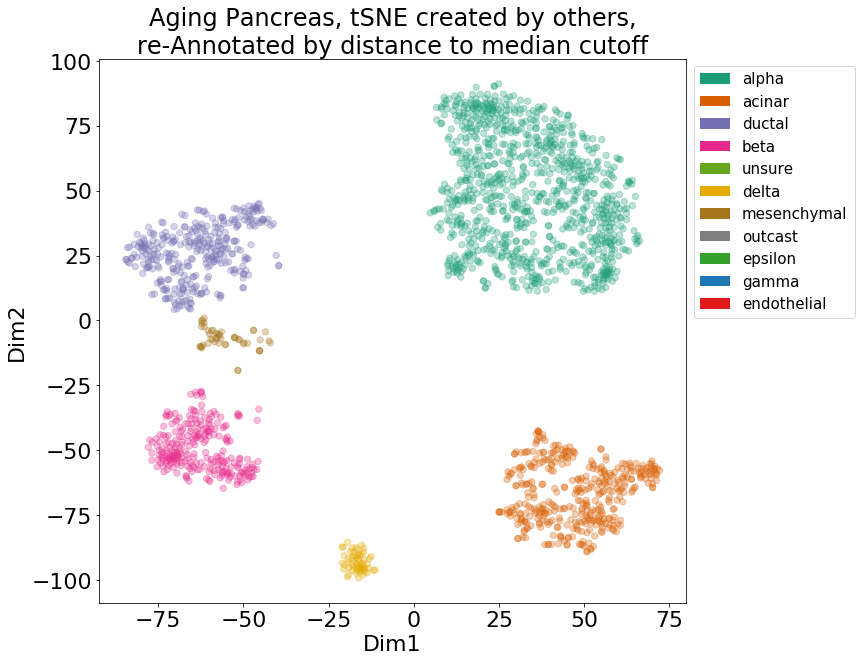

In [730]:
tmp = AA_meta[(AA_meta['radius_annot']!='outcast')&(~AA_meta['radius_annot'].isna())]
colors = tmp['radius_annot'].map(lut)

f = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
tmp.plot.scatter('Dim1','Dim2',ax=ax,color=colors,s=40,alpha=.3)#,label=colors.keys)
#medians.plot.scatter('Dim1','Dim2',ax=ax,color=medians.index.map(lut),s=400,alpha=1)

for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
#plt.yticks([]);plt.xticks([])
plt.title('Aging Pancreas, tSNE created by others,\nre-Annotated by distance to median cutoff')
plt.gcf().subplots_adjust(left=.05,right=0.73)
plt.show()
f.savefig(savedir+'Atlas_tSNE_cellTypes_reAnnotRadius_classesOnly.png')


/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]


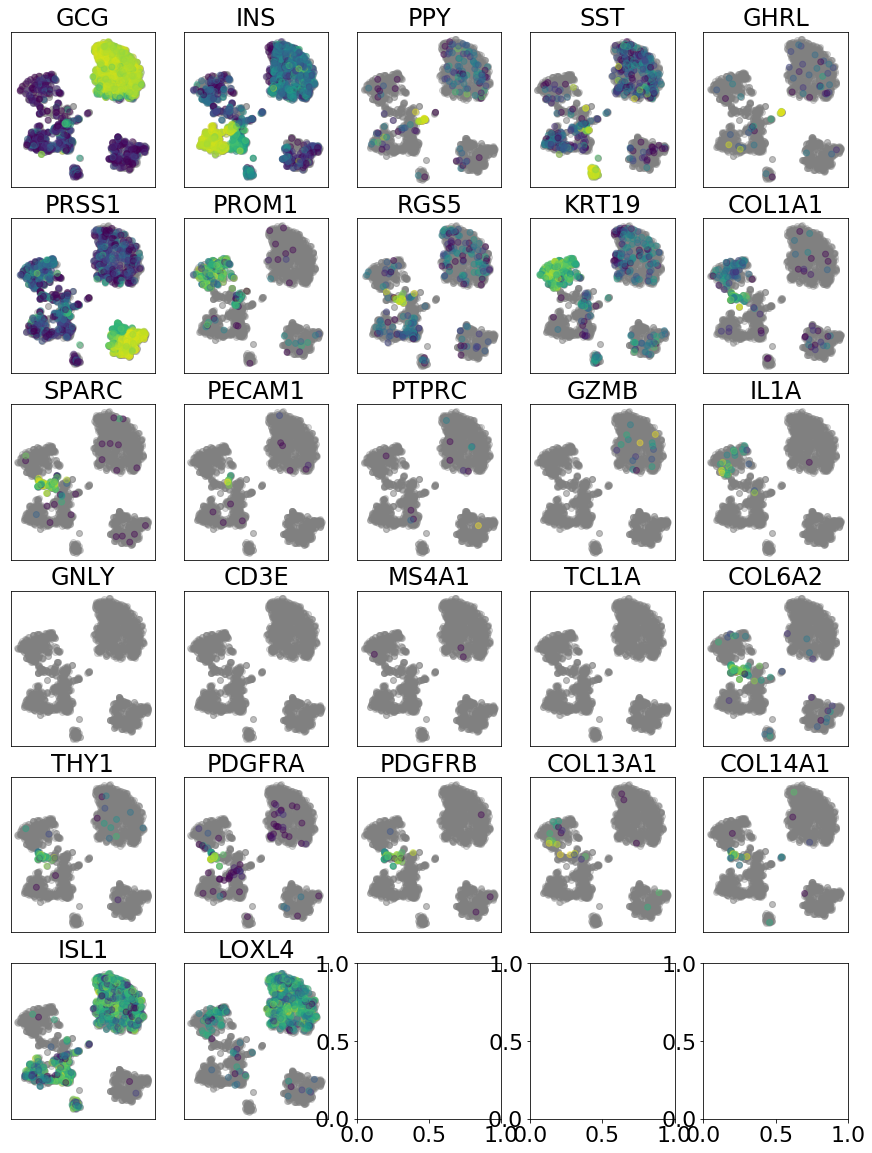

In [489]:
f,ax = plt.subplots(6,5,figsize=(15,20))
ax = ax.ravel()

types = ['alpha','beta','gamma','delta','epsilon','acinar','ductal','stellate','endo','mesenchymal']
key_markers = ['GCG','INS','PPY','SST','GHRL','PRSS1','PROM1','RGS5','KRT19',
               'COL1A1','SPARC','PECAM1','PTPRC','GZMB','IL1A','GNLY','CD3E','MS4A1'
               ,'TCL1A','COL6A2','THY1','PDGFRA','PDGFRB','COL13A1','COL14A1','ISL1','LOXL4']

for i in range(len(key_markers)):
    gene = key_markers[i]
    #TuPa_meta[gene] = TuPa_counttable.loc[gene].divide(TuPa_meta['nReads'])
    ax[i].scatter(AA_meta['Dim1'],AA_meta['Dim2'],c='gray',alpha=.3)
    ax[i].scatter(AA_meta['Dim1'],AA_meta['Dim2'],cmap='viridis',alpha=.4,c=np.log2(AA_counttable.loc[gene,AA_meta.index]))
    ax[i].set_title(gene)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    """ax[i].set_xlim(right=65)
    ax[i].set_ylim(bottom=-60)"""
    
f.savefig(savedir+date+'/key_pancreatic_marker_genes_tsnedf_martin.png')
f.savefig(savedir+date+'/key_pancreatic_marker_genes_tsnedf_martin.pdf')

# re-annotating the atlas starting from unbiased approach

In [706]:
import leidenalgorithm_implementation as li
imp.reload(li)
AAmatrix,AA_meta2 = sam.normalize_UMGs(AA_counttable,AA_meta)
keez = ['savedir','savename']
valz = [savedir,'_darmanis_brainAtlas_reannotation']
kwags = dict(zip(keez,valz))
AAmatrix_feature_selected = li.feature_select_counttable(AAmatrix.dropna(how='all',axis=1),AA_meta2,600,**kwags)

-------------------------------------------
genes to be removed from counttable:
['BIVM-ERCC5', 'ERCC-00002', 'ERCC-00003', 'ERCC-00004', 'ERCC-00009', 'ERCC-00012', 'ERCC-00013', 'ERCC-00014', 'ERCC-00016', 'ERCC-00017', 'ERCC-00019', 'ERCC-00022', 'ERCC-00024', 'ERCC-00025', 'ERCC-00028', 'ERCC-00031', 'ERCC-00033', 'ERCC-00034', 'ERCC-00035', 'ERCC-00039', 'ERCC-00040', 'ERCC-00041', 'ERCC-00042', 'ERCC-00043', 'ERCC-00044', 'ERCC-00046', 'ERCC-00048', 'ERCC-00051', 'ERCC-00053', 'ERCC-00054', 'ERCC-00057', 'ERCC-00058', 'ERCC-00059', 'ERCC-00060', 'ERCC-00061', 'ERCC-00062', 'ERCC-00067', 'ERCC-00069', 'ERCC-00071', 'ERCC-00073', 'ERCC-00074', 'ERCC-00075', 'ERCC-00076', 'ERCC-00077', 'ERCC-00078', 'ERCC-00079', 'ERCC-00081', 'ERCC-00083', 'ERCC-00084', 'ERCC-00085', 'ERCC-00086', 'ERCC-00092', 'ERCC-00095', 'ERCC-00096', 'ERCC-00097', 'ERCC-00098', 'ERCC-00099', 'ERCC-00104', 'ERCC-00108', 'ERCC-00109', 'ERCC-00111', 'ERCC-00112', 'ERCC-00113', 'ERCC-00116', 'ERCC-00117', 'ERCC-00

In [712]:
genes = pd.read_csv('../leidenalg/Datasets/Pancreas/reference_data/Supplemental_Table_S7_key_marker_genes.csv')
geneli= [list(genes[f].dropna()) for f in genes.columns]
genelist = [item for sublist in geneli for item in sublist]

In [674]:
imp.reload(li)
#AAdistance_matrix = li.preprocessing(AAmatrix_feature_selected,AA_meta2)
AAdistance_matrix = li.preprocessing(AAmatrix.loc[set(genelist),:],AA_meta2)

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


----------------------------------------------------
Loaded counttable, started processing
Local time: 16:50
----------------------------------------------------


/home/bojk/Data/minimeta_pyfiles/leidenalgorithm_implementation.py:97: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normENS.drop(normENS[normENS.sum(axis=1).sort_values()==0].index,inplace=True)


----------------------------------------------------
Processing counttable and computing distance matrix took 5.18 seconds
Finished at local time: 16:50
----------------------------------------------------


In [713]:
AAprincdf,distma = sam.unweighted_PCA(AAmatrix[AAmatrix.index.isin(list(set(genelist)))].dropna(how='all',axis=1),20,0)
#AAprincdf,distma = sam.unweighted_PCA(AAmatrix_feature_selected,20,0)
AAtsnedf = sam.perform_tSNE(AAprincdf)

-------------------------------------------
performing UNweighted PCA
-------------------------------------------
perfoming tSNE
assigned default perplexity of 20
tSNE done.
-------------------------------------------


In [714]:
AAtsnedf
"""AA_meta2
AA_meta2.loc[AAtsnedf.index]
AAmatrix.shape"""
len(set(AAmatrix.columns).difference(set(AAmatrix_feature_selected.columns)))
#AAtsnedf.loc['X1000101502.B10']
#AAtsnedf.loc['X1000101502.B10']d
#AAmatrix.loc[set(genelist),:].shape
#AAmatrix_feature_selected.shape

1757

In [715]:
len(AAtsnedf)
AA_meta2['new_tsne1'] = np.nan;AA_meta2['new_tsne2'] = np.nan

AA_meta2.loc[AAtsnedf.index,'new_tsne1'] = AAtsnedf[0]
AA_meta2.loc[AAtsnedf.index,'new_tsne2'] = AAtsnedf[1]
AA_meta2[AA_meta2['new_tsne2'].isna()]['celltypes'].value_counts()
AA_meta2 = AA_meta2[~AA_meta2['new_tsne2'].isna()].copy()
#AA_meta2.plot.scatter('new_tsne1','new_tsne2')
#AA_meta2['new']

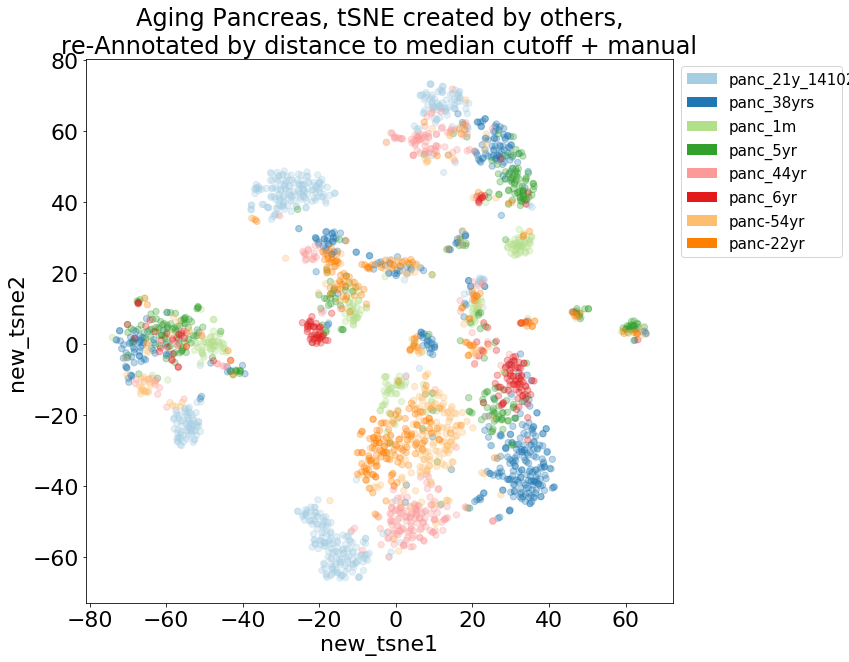

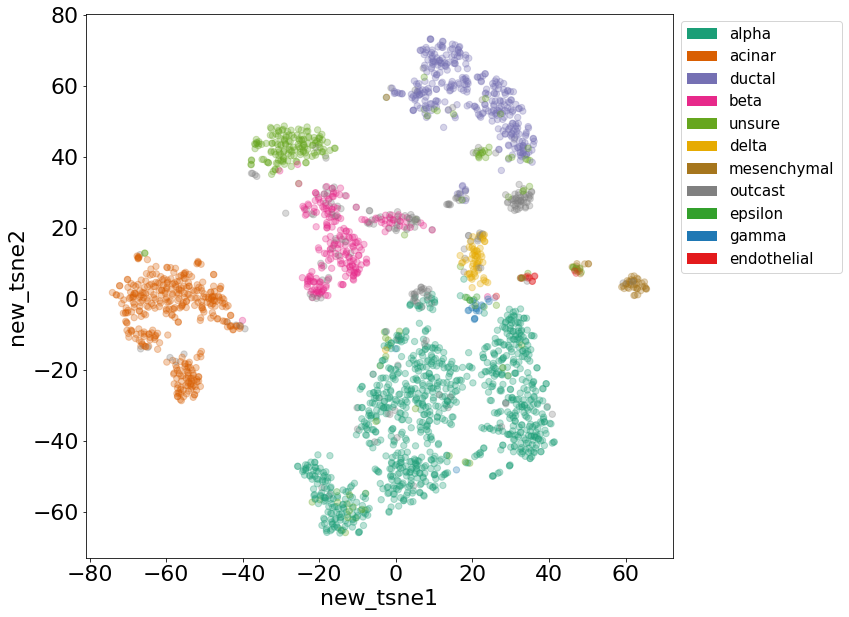

In [731]:
kee = AA_meta2.experiment_name.unique()
lut_exp = dict(zip(kee,sns.color_palette('Paired',len(kee))))

colors = AA_meta2['man_annot'].fillna('unsure').map(lut)
colors_exp = AA_meta2['experiment_name'].map(lut_exp)

f = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
AA_meta2.plot.scatter('new_tsne1','new_tsne2',ax=ax,color=colors_exp,s=40,alpha=.3)#,label=colors.keys)
#medians.plot.scatter('Dim1','Dim2',ax=ax,color=medians.index.map(lut),s=400,alpha=1)

for x,y in lut_exp.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
#plt.yticks([]);plt.xticks([])
plt.title('Aging Pancreas, tSNE created by others,\nre-Annotated by distance to median cutoff + manual')
plt.gcf().subplots_adjust(left=.05,right=0.73)
plt.show()


f = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
AA_meta2.plot.scatter('new_tsne1','new_tsne2',ax=ax,color=colors,s=40,alpha=.3)#,label=colors.keys)
#medians.plot.scatter('Dim1','Dim2',ax=ax,color=medians.index.map(lut),s=400,alpha=1)

for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
#plt.yticks([]);plt.xticks([])
#plt.title('Aging Pancreas, tSNE created by others,\nre-Annotated by distance to median cutoff + manual')
plt.gcf().subplots_adjust(left=.05,right=0.73)
plt.show()
#f.savefig(savedir+'Atlas_tSNE_cellTypes_reAnnotRadManual_classesOnly.png')


In [719]:
AA_meta2.experiment_name.value_counts()
lut

{'panc_21y_141021': (0.10588235294117647,
  0.6196078431372549,
  0.4666666666666667),
 'panc_38yrs': (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 'panc_5yr': (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 'panc-22yr': (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 'panc_44yr': (0.4, 0.6509803921568628, 0.11764705882352941),
 'panc-54yr': (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 'panc_1m': (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 'panc_6yr': (0.4, 0.4, 0.4)}

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]


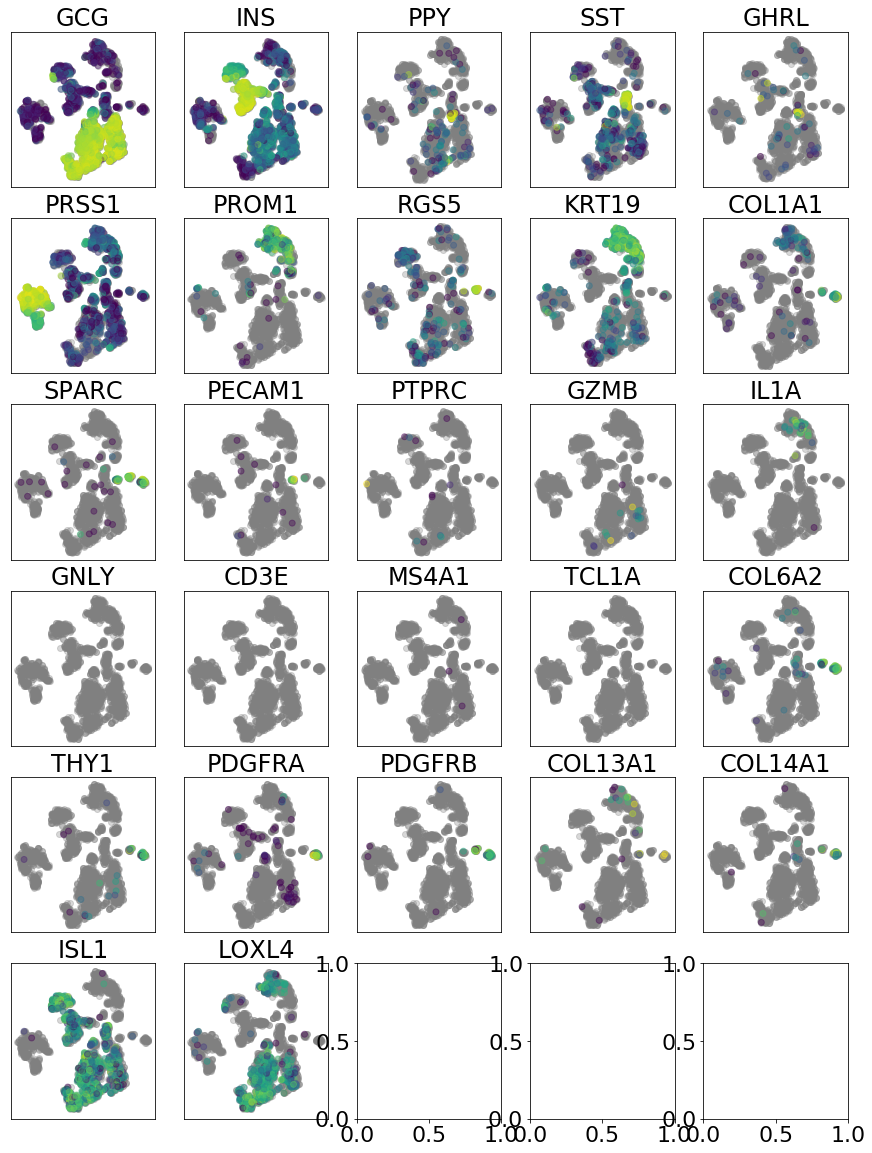

In [732]:
f,ax = plt.subplots(6,5,figsize=(15,20))
ax = ax.ravel()

types = ['alpha','beta','gamma','delta','epsilon','acinar','ductal','stellate','endo','mesenchymal']
key_markers = ['GCG','INS','PPY','SST','GHRL','PRSS1','PROM1','RGS5','KRT19',
               'COL1A1','SPARC','PECAM1','PTPRC','GZMB','IL1A','GNLY','CD3E','MS4A1'
               ,'TCL1A','COL6A2','THY1','PDGFRA','PDGFRB','COL13A1','COL14A1','ISL1','LOXL4']

for i in range(len(key_markers)):
    gene = key_markers[i]
    #TuPa_meta[gene] = TuPa_counttable.loc[gene].divide(TuPa_meta['nReads'])
    ax[i].scatter(AA_meta2['new_tsne1'],AA_meta2['new_tsne2'],c='gray',alpha=.3)
    ax[i].scatter(AA_meta2['new_tsne1'],AA_meta2['new_tsne2'],cmap='viridis',alpha=.4,c=np.log2(AA_counttable.loc[gene,AA_meta2.index]))
    ax[i].set_title(gene)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

# atlas averages

In [734]:
import io
import requests
url="https://github.com/iosonofabio/atlas_averages/blob/master/table.tsv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
c

ParserError: Error tokenizing data. C error: Expected 1 fields in line 32, saw 2


# removing 'unsure' cell class from data

In [ ]:
AA_newmeta = AA_meta[AA_meta['celltypes']!='unsure'].copy()
len(AA_newmeta)

# basic dataset characteristics

In [ ]:
f,ax = plt.subplots(figsize=(6,5))
newlut = dict(zip(np.sort(AA_newmeta['celltypes'].unique()),sns.color_palette('Paired',len(AA_newmeta['celltypes'].unique()))))
colors = AA_newmeta['celltypes'].value_counts().index.map(newlut)
AA_newmeta['celltypes'].value_counts().plot.barh(width=.9,ax=ax,color=colors)
plt.gca().invert_yaxis()
plt.title('Atlas data')
plt.xlabel('number of cells')
plt.gcf().subplots_adjust(left=.5,right=0.95,bottom=.2,top=.9)
f.savefig(savedir+'Atlas_data_original_cellNumBarh.png')
f.savefig(savedir+'Atlas_data_original_cellNumBarh.pdf')

"""f,ax = plt.subplots(figsize=(6,5))
keys = TuPa_meta['celltypes'].value_counts().index;values=sns.color_palette('Paired',len(keys))
lut = dict(zip(keys,values))
colors = TuPa_meta['celltypes'].value_counts().index.map(lut)
TuPa_meta['celltypes'].value_counts().plot.barh(width=.9,color=colors,ax=ax)
plt.gca().invert_yaxis()
plt.xlabel('number of cells')
plt.title('New data')
plt.gcf().subplots_adjust(left=.5,right=0.95,bottom=.2,top=.9)
f.savefig(savedir+'New_data_original_cellNumBarh_curated.png')
f.savefig(savedir+'New_data_original_cellNumBarh_curated.pdf')"""

In [ ]:
keys = TuPa_meta['Tumor'].value_counts().index;values=sns.color_palette('Paired',12)+sns.color_palette('Set2',len(keys)-12)
lut = dict(zip(keys,values))
colors = TuPa_meta['Tumor'].map(lut)

f,ax = plt.subplots(figsize=(11,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',c=colors,ax=ax,alpha=.4,s=60)

for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Original tSNE and annotation of new data')
plt.gcf().subplots_adjust(left=.05,right=0.73)
f.savefig(savedir+'tSNE_original_oldAnnotation_curatedData.png')
f.savefig(savedir+'tSNE_original_oldAnnotation_curatedData.pdf')

In [244]:
(genes_ODSU20[genes_ODSU20.isin(third_clust)].isna()==False).sum()

acinar         0
alpha          0
beta           0
delta          0
ductal         0
mesenchymal    0
newClass07     1
newClass02     0
newClass01     0
newClass08     0
newClass03     0
newClass06     0
newClass04     0
newClass05     0
newClass11     0
newClass10     0
newClass09     0
dtype: int64

In [249]:
alpha = ['GCG','LOXL4','PLCE1','IRX2','GC','KLHL41','CRYBA2','TM4SF4','RGS4']
beta = ['INS','IAPP','MAFA','NPTX2','DLK1','ADCYAP1','PFKFB2','PDX1','TGFBR3','SYT13']
delta = ['SST','PRG4','LEPR','RBP4','BCHE','HHEX','FRZB','PCSK1','RGS2','GABRG2']
gamma = ['PPY']
epsilon = ['GHRL','ISL1']

acinar = ['PRSS1']
ductal = ['PROM1','KRT19','SPARC']
stellate = ['RGS5','PDGFRA','SPARC','COL1A1']
endo = ['VWF','SPARC'] 
panendothelial = ['PECAM1','CDH5','ESAM','FLT1','KDR']
mesenchymal = ['THY1']


pdac = ['LAMC2','CTSE','GPX2','LGALS4','GPRC5A','MMP14','ITGA2','AGR2','COL17A1','TSPAN8','CEACAM7']
ict = ['SCG2','RASSF7','TTR','SGNE1','INSM1','PCSK2','QPCT','FGB','PEX7','PTPRN2','SERPINA1','ARF3']
third_clust = ['AXIN2','AXL','MAFB','MMP2','BGN','COL1A2','FN1','SPARC']

force_include = set(alpha+beta+delta+gamma+epsilon+acinar+ductal+stellate+endo+panendothelial+mesenchymal)

KOLS = ['alpha','beta','delta','gamma','PDAC','acinar','islet cell tumors','third_cluster']

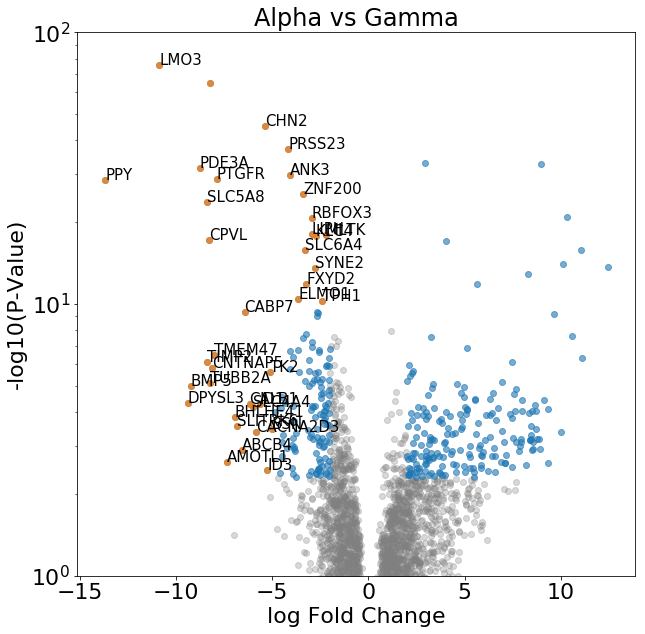

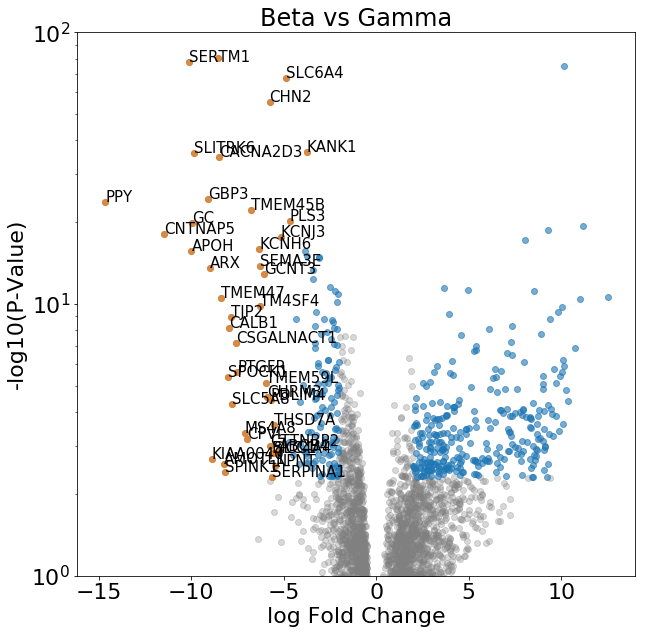

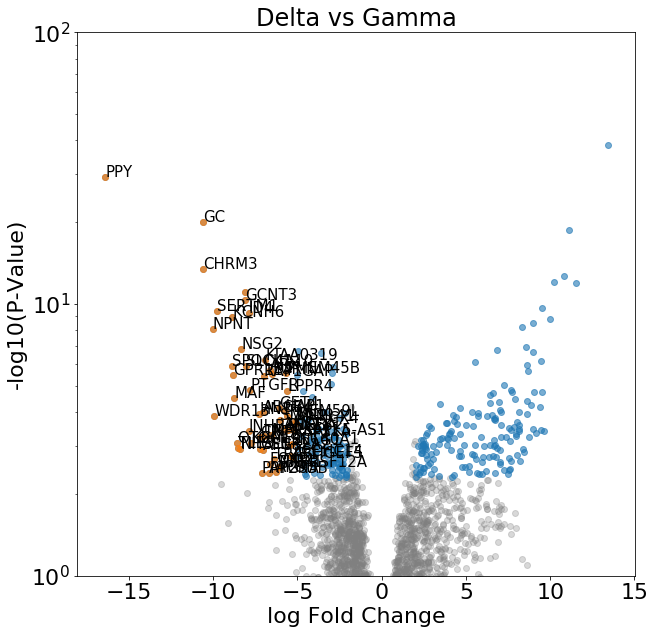

In [447]:
alphavsgamma = pd.read_csv('../leidenalg/Datasets/Pancreas/reference_data/Supplemental_Table_S6_nont2d_alpha_vs_gamma.csv')

f= plt.figure(figsize=(10,10))
a = alphavsgamma[(alphavsgamma['logFC']<=2)&(alphavsgamma['logFC']>=-2)|(alphavsgamma['PValue']>=.005)]
b = alphavsgamma[((alphavsgamma['logFC']>2)|(alphavsgamma['logFC']<-2))&(alphavsgamma['PValue']<.005)]
c = alphavsgamma[(alphavsgamma['logFC']<-2)&(alphavsgamma['PValue']<.005)]
plt.scatter(a['logFC'],-np.log10(a['PValue']),alpha=.3,color='gray')
plt.scatter(b['logFC'],-np.log10(b['PValue']),alpha=.6)
alp =c[(c['logFC']<-5)|(-np.log10(c['PValue'])>10)]
plt.scatter(alp['logFC'],-np.log10(alp['PValue']),alpha=.7)
for gene in alp.dropna(how='any').sort_values('logFC')['Associated.Gene.Name'][:40]:
    x = alp[alp['Associated.Gene.Name']==gene]['logFC']
    y= -np.log10(alp[alp['Associated.Gene.Name']==gene]['PValue'])
    plt.text(x,y,gene,fontsize=15)
plt.yscale('log')
plt.ylim(1,100)
plt.xlabel('log Fold Change')
plt.ylabel('-log10(P-Value)')
plt.title('Alpha vs Gamma')
f.savefig('../leidenalg/Datasets/Pancreas/reference_data/alpha_vs_gamma.png')

alphavsgamma = pd.read_csv('../leidenalg/Datasets/Pancreas/reference_data/Supplemental_Table_S6_nont2d_beta_vs_gamma.csv')

f= plt.figure(figsize=(10,10))
a = alphavsgamma[(alphavsgamma['logFC']<=2)&(alphavsgamma['logFC']>=-2)|(alphavsgamma['PValue']>=.005)]
b = alphavsgamma[((alphavsgamma['logFC']>2)|(alphavsgamma['logFC']<-2))&(alphavsgamma['PValue']<.005)]
c = alphavsgamma[(alphavsgamma['logFC']<-2)&(alphavsgamma['PValue']<.005)]
plt.scatter(a['logFC'],-np.log10(a['PValue']),alpha=.3,color='gray')
plt.scatter(b['logFC'],-np.log10(b['PValue']),alpha=.6)
bet =c[(c['logFC']<-5)|(-np.log10(c['PValue'])>20)]
plt.scatter(bet['logFC'],-np.log10(bet['PValue']),alpha=.7)
for gene in bet.dropna(how='any').sort_values('logFC')['Associated.Gene.Name']:
    x = bet[bet['Associated.Gene.Name']==gene]['logFC']
    y= -np.log10(bet[bet['Associated.Gene.Name']==gene]['PValue'])
    plt.text(x,y,gene,fontsize=15)
plt.yscale('log')
plt.ylim(1,100)
plt.xlabel('log Fold Change')
plt.ylabel('-log10(P-Value)')
plt.title('Beta vs Gamma')
f.savefig('../leidenalg/Datasets/Pancreas/reference_data/beta_vs_gamma.png')

alphavsgamma = pd.read_csv('../leidenalg/Datasets/Pancreas/reference_data/Supplemental_Table_S6_nont2d_delta_vs_gamma.csv')

f= plt.figure(figsize=(10,10))
a = alphavsgamma[(alphavsgamma['logFC']<=2)&(alphavsgamma['logFC']>=-2)|(alphavsgamma['PValue']>=.005)]
b = alphavsgamma[((alphavsgamma['logFC']>2)|(alphavsgamma['logFC']<-2))&(alphavsgamma['PValue']<.005)]
c = alphavsgamma[(alphavsgamma['logFC']<-2)&(alphavsgamma['PValue']<.005)]
plt.scatter(a['logFC'],-np.log10(a['PValue']),alpha=.3,color='gray')
plt.scatter(b['logFC'],-np.log10(b['PValue']),alpha=.6)
d =c[(c['logFC']<-5)|(-np.log10(c['PValue'])>20)]
plt.scatter(d['logFC'],-np.log10(d['PValue']),alpha=.7)
for gene in d.dropna(how='any').sort_values('logFC')['Associated.Gene.Name']:
    x = d[d['Associated.Gene.Name']==gene]['logFC']
    y= -np.log10(d[d['Associated.Gene.Name']==gene]['PValue'])
    plt.text(x,y,gene,fontsize=15)
plt.yscale('log')
plt.ylim(1,100)
plt.xlabel('log Fold Change')
plt.ylabel('-log10(P-Value)')
plt.title('Delta vs Gamma')
f.savefig('../leidenalg/Datasets/Pancreas/reference_data/delta_vs_gamma.png')

In [444]:
alphavsgamma[(alphavsgamma['logFC']<-4)&(-np.log10(alphavsgamma['PValue'])>10)]
d.dropna(how='any').sort_values('logFC')['Associated.Gene.Name'][:30]
#set(+list(bet.dropna(how='any').sort_values('logFC')['Associated.Gene.Name'])+list(d.dropna(how='any').sort_values('logFC')['Associated.Gene.Name']))
unionall = set(alp.dropna(how='any').sort_values('logFC')['Associated.Gene.Name']).intersection(set(bet.dropna(how='any').sort_values('logFC')['Associated.Gene.Name']).intersection(set(d.dropna(how='any').sort_values('logFC')['Associated.Gene.Name'])))
unionab = set(alp.dropna(how='any').sort_values('logFC')['Associated.Gene.Name']).intersection(set(bet.dropna(how='any').sort_values('logFC')['Associated.Gene.Name']))
matrix_feature_selected.loc[unionab]

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


acinar      alpha        beta       delta       ductal  \
TMEM47          NaN        NaN         NaN         NaN          NaN   
ABCB4           NaN        NaN         NaN         NaN          NaN   
CPVL            NaN        NaN         NaN         NaN          NaN   
CACNA2D3        NaN        NaN         NaN         NaN          NaN   
CHN2            NaN        NaN         NaN         NaN          NaN   
SLC4A4    14.231274   9.012454   13.609895   46.163610  1213.219288   
SLITRK6    0.006747   0.746903    0.000000   67.230387     0.004994   
CNTNAP5         NaN        NaN         NaN         NaN          NaN   
PPY        1.326469  19.484280  101.184387    6.561480     0.398460   
PTGFR           NaN        NaN         NaN         NaN          NaN   
SLC5A8     0.085350   0.219460    0.027990   35.281980     0.056924   
SLC6A4     0.008038  31.738389    4.600375    3.594259     0.269383   
AMOTL1          NaN        NaN         NaN         NaN          NaN   
CALB1      0.003354   0.958679    4.960657  119.729746     0.001870   

          mesenchymal  TuPa1_Plate2_B10_S000  TuPa1_Plate2_G3_S000  \
TMEM47            NaN                    NaN                   NaN   
ABCB4             NaN                    NaN                   NaN   
CPVL              NaN                    NaN                   NaN   
CACNA2D3          NaN                    NaN                   NaN   
CHN2              NaN                    NaN                   NaN   
SLC4A4       4.515268                    0.0                   0.0   
SLITRK6      0.000000                    0.0                   0.0   
CNTNAP5           NaN                    NaN                   NaN   
PPY          0.613361                    0.0                   0.0   
PTGFR             NaN                    NaN                   NaN   
SLC5A8       0.000000                    0.0                   0.0   
SLC6A4       0.000000                    0.0                   0.0   
AMOTL1            NaN                    NaN                   NaN   
CALB1        0.000000                    0.0                   0.0   

          TuPa1_Plate1_D8_S000  TuPa1_Plate1_B5_S000  ...  \
TMEM47                     NaN                   NaN  ...   
ABCB4                      NaN                   NaN  ...   
CPVL                       NaN                   NaN  ...   
CACNA2D3                   NaN                   NaN  ...   
CHN2                       NaN                   NaN  ...   
SLC4A4                     0.0                   0.0  ...   
SLITRK6                    0.0                   0.0  ...   
CNTNAP5                    NaN                   NaN  ...   
PPY                        0.0                   0.0  ...   
PTGFR                      NaN                   NaN  ...   
SLC5A8                     0.0                   0.0  ...   
SLC6A4                     0.0                   0.0  ...   
AMOTL1                     NaN                   NaN  ...   
CALB1                      0.0                   0.0  ...   

          TuPa28_Plate1_H1_S166  TuPa28_Plate1_B17_S44  TuPa28_Plate1_C23_S73  \
TMEM47                      NaN                    NaN                    NaN   
ABCB4                       NaN                    NaN                    NaN   
CPVL                        NaN                    NaN                    NaN   
CACNA2D3                    NaN                    NaN                    NaN   
CHN2                        NaN                    NaN                    NaN   
SLC4A4                      0.0                    0.0                    0.0   
SLITRK6                     0.0                    0.0                    0.0   
CNTNAP5                     NaN                    NaN                    NaN   
PPY                         0.0                    0.0                    0.0   
PTGFR                       NaN                    NaN                    NaN   
SLC5A8                      0.0                    0.0                    0.0   
SLC6A4  

In [448]:
unionab

{'ABCB4',
 'AMOTL1',
 'CACNA2D3',
 'CALB1',
 'CHN2',
 'CNTNAP5',
 'CPVL',
 'PPY',
 'PTGFR',
 'SLC4A4',
 'SLC5A8',
 'SLC6A4',
 'SLITRK6',
 'TMEM47'}

# set date here

In [358]:
#matrix_feature_selected.index.str.contains('PPY')

In [450]:
date = time.datenum_complete()
date

'20190815144641'

In [256]:
"""f,ax = plt.subplots(4,3,figsize=(15,20))
ax = ax.ravel()

types = ['alpha','beta','gamma','delta','epsilon','acinar','ductal','stellate','endo','mesenchymal']
key_markers = ['GCG','INS','PPY','SST','GHRL','PRSS1','PROM1','RGS5','VWF','THY1','PECAM1','SPARC']

for i in range(len(key_markers)):
    gene = key_markers[i]
    TuPa_meta[gene] = TuPa_counttable.loc[gene].divide(TuPa_meta['nReads'])
    ax[i].scatter(TuPa_meta['tSNE_1'],TuPa_meta['tSNE_2'],c='gray',alpha=.3)
    ax[i].scatter(TuPa_meta['tSNE_1'],TuPa_meta['tSNE_2'],cmap='viridis',alpha=.4,c=np.log2(TuPa_meta[gene]))
    ax[i].set_title(gene)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
#f.savefig(savedir+date+'/key_pancreatic_marker_genes.png')
#f.savefig(savedir+date+'/key_pancreatic_marker_genes.pdf')
#ax[-1].scatter(TuPa_meta['tSNE_1'],TuPa_meta['tSNE_2'],c='b',alpha=.6)
    

"""

"f,ax = plt.subplots(4,3,figsize=(15,20))\nax = ax.ravel()\n\ntypes = ['alpha','beta','gamma','delta','epsilon','acinar','ductal','stellate','endo','mesenchymal']\nkey_markers = ['GCG','INS','PPY','SST','GHRL','PRSS1','PROM1','RGS5','VWF','THY1','PECAM1','SPARC']\n\nfor i in range(len(key_markers)):\n    gene = key_markers[i]\n    TuPa_meta[gene] = TuPa_counttable.loc[gene].divide(TuPa_meta['nReads'])\n    ax[i].scatter(TuPa_meta['tSNE_1'],TuPa_meta['tSNE_2'],c='gray',alpha=.3)\n    ax[i].scatter(TuPa_meta['tSNE_1'],TuPa_meta['tSNE_2'],cmap='viridis',alpha=.4,c=np.log2(TuPa_meta[gene]))\n    ax[i].set_title(gene)\n    ax[i].set_xticks([])\n    ax[i].set_yticks([])\n#f.savefig(savedir+date+'/key_pancreatic_marker_genes.png')\n#f.savefig(savedir+date+'/key_pancreatic_marker_genes.pdf')\n#ax[-1].scatter(TuPa_meta['tSNE_1'],TuPa_meta['tSNE_2'],c='b',alpha=.6)\n    \n\n"

# no self-edging

In [569]:
AA_counttable.sum().head(10)

X1000010011.A01    263313.0
X1000010011.A02    210189.0
X1000010011.A03    346236.0
X1000010011.A04    136211.0
X1000010011.A05    320666.0
X1000010011.A06    372732.0
X1000010011.A07    447263.0
X1000010011.A08    499603.0
X1000010011.A09    362927.0
X1000010011.A10    531050.0
dtype: float64

In [570]:
AA_newmeta[['total_reads','mapped_reads','n_reads']].head()

total_reads  mapped_reads   n_reads
X1000010011.A02      1269102        905062  205682.0
X1000010011.A05      1477465        793411  313907.0
X1000010011.A06      1633234       1000518  366110.0
X1000010011.A07      1609070       1115820  437140.0
X1000010011.A11      1463584        963425  192107.0

In [562]:
imp.reload(sam)
atlasgenes = 100
atlasweights = 20

keys = ['cell type column','number of features cell type','number of features new data'
        ,'weights_atlas_cells','timestamp','savedir']
values = ['celltypes',atlasgenes,20,atlasweights,date,savedir]
kwds = dict(zip(keys,values))
matrix,weights, AA_newmeta,TuPa_meta = sam.normmerge_twoCounttables(AA_counttable,
                                                                             AA_newmeta, TuPa_counttable, TuPa_meta, **kwds)
#matrix_feature_selected = sam.feature_select(matrix.dropna(how='all',axis=1),AA_newmeta,**kwds)
#matrix_feature_selected =  matrix_feature_selected.append(matrix.loc[unionab.difference(set(matrix_feature_selected.index))].copy())

-------------------------------------------
genes to be removed from counttable:
['BIVM-ERCC5', 'ERCC-00002', 'ERCC-00003', 'ERCC-00004', 'ERCC-00009', 'ERCC-00012', 'ERCC-00013', 'ERCC-00014', 'ERCC-00016', 'ERCC-00017', 'ERCC-00019', 'ERCC-00022', 'ERCC-00024', 'ERCC-00025', 'ERCC-00028', 'ERCC-00031', 'ERCC-00033', 'ERCC-00034', 'ERCC-00035', 'ERCC-00039', 'ERCC-00040', 'ERCC-00041', 'ERCC-00042', 'ERCC-00043', 'ERCC-00044', 'ERCC-00046', 'ERCC-00048', 'ERCC-00051', 'ERCC-00053', 'ERCC-00054', 'ERCC-00057', 'ERCC-00058', 'ERCC-00059', 'ERCC-00060', 'ERCC-00061', 'ERCC-00062', 'ERCC-00067', 'ERCC-00069', 'ERCC-00071', 'ERCC-00073', 'ERCC-00074', 'ERCC-00075', 'ERCC-00076', 'ERCC-00077', 'ERCC-00078', 'ERCC-00079', 'ERCC-00081', 'ERCC-00083', 'ERCC-00084', 'ERCC-00085', 'ERCC-00086', 'ERCC-00092', 'ERCC-00095', 'ERCC-00096', 'ERCC-00097', 'ERCC-00098', 'ERCC-00099', 'ERCC-00104', 'ERCC-00108', 'ERCC-00109', 'ERCC-00111', 'ERCC-00112', 'ERCC-00113', 'ERCC-00116', 'ERCC-00117', 'ERCC-00

-------------------------------------------
Cell types in atlas:
['acinar' 'alpha' 'beta' 'delta' 'ductal' 'mesenchymal']
-------------------------------------------
Cell types in new data:
[nan]
-------------------------------------------


In [454]:
imp.reload(sam)
kwds['threshold_neigborhood'] = thresn = .8
kwds['n_pcs'] = n_pcs = 20 
kwds['resolution_parameter'] = respar = .015
kwds['self_edging'] = False
kwds['select_features']=False

tsnedf, class_numbers,class_labels,distmat = sam.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,AA_newmeta,TuPa_meta,**kwds)

-------------------------------------------
performing UNweighted PCA
-------------------------------------------
perfoming tSNE
tSNE done.
-------------------------------------------


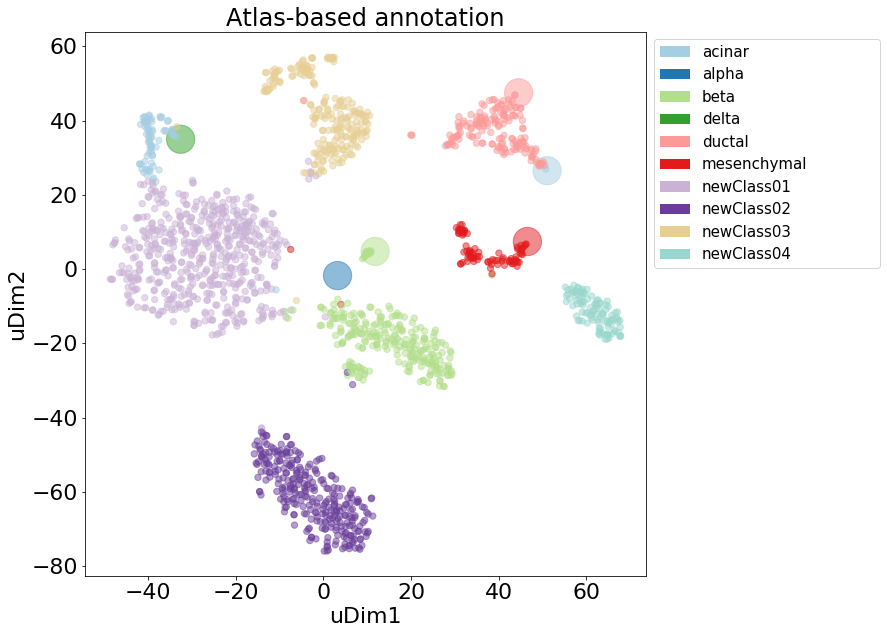

In [455]:
if (len(class_labels)-8) % 2 == 0:
    added_colors = sns.color_palette('BrBG',len(class_labels)-8)
else:
    all_colors = sns.color_palette('BrBG',len(class_labels)-7)
    mid = round((len(all_colors)-1)/2)
    added_colors = all_colors[:mid]+all_colors[mid+1:]
    
values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+added_colors
newlut = dict(zip(class_numbers,values))
newcolor = tsnedf['class'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
tsnedf.plot.scatter('uDim1','uDim2',s=weights*40
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,class_labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('Atlas-based annotation')
#plt.xlim(right=65)
#plt.ylim(bottom=-60)
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/sA_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/sA_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')

In [356]:
tsnedf.new_membership.value_counts()

newClass01     577
newClass02     298
beta           273
newClass03     223
ductal         166
newClass04     106
mesenchymal     87
delta           67
acinar           3
alpha            1
Name: new_membership, dtype: int64

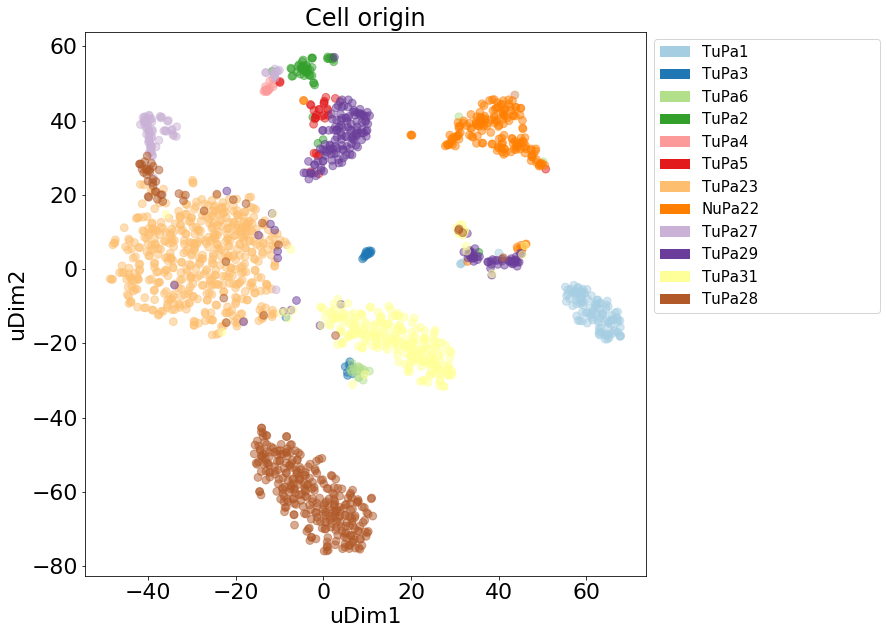

In [457]:
keys = TuPa_meta['Tumor'].unique()
newlut = dict(zip(keys,sns.color_palette('Paired', len(keys))))
newcolor = TuPa_meta['Tumor'].map(newlut)
f,ax = plt.subplots(figsize=(12,10))
tsnedf[6:].plot.scatter('uDim1','uDim2',s=60
                    ,alpha=.5,color=newcolor.loc[tsnedf[6:].index],ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('Cell origin')
plt.gcf().subplots_adjust(left=.1,right=0.75)
"""plt.ylim(bottom=-60)
plt.xlim(right=65)"""
f.savefig(savedir+date+'/TumorPatients_newtSNE.pdf')
f.savefig(savedir+date+'/TumorPatients_newtSNE.png')

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':


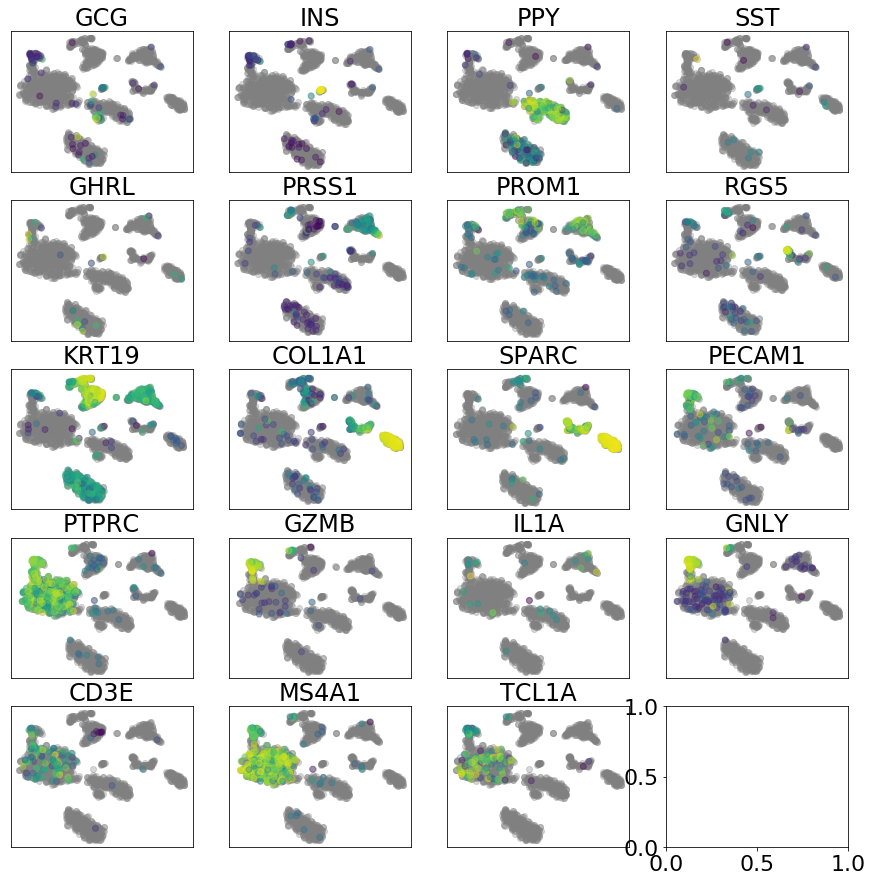

In [468]:
f,ax = plt.subplots(5,4,figsize=(15,15))
ax = ax.ravel()

types = ['alpha','beta','gamma','delta','epsilon','acinar','ductal','stellate','endo','mesenchymal']
key_markers = ['GCG','INS','PPY','SST','GHRL','PRSS1','PROM1','RGS5','KRT19',
               'COL1A1','SPARC','PECAM1','PTPRC','GZMB','IL1A','GNLY','CD3E','MS4A1','TCL1A']

for i in range(len(key_markers)):
    gene = key_markers[i]
    #TuPa_meta[gene] = TuPa_counttable.loc[gene].divide(TuPa_meta['nReads'])
    ax[i].scatter(tsnedf['uDim1'],tsnedf['uDim2'],c='gray',alpha=.3)
    ax[i].scatter(tsnedf['uDim1'],tsnedf['uDim2'],cmap='viridis',alpha=.4,c=np.log2(matrix.loc[gene]))
    ax[i].set_title(gene)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    """ax[i].set_xlim(right=65)
    ax[i].set_ylim(bottom=-60)"""
    
f.savefig(savedir+date+'/key_pancreatic_marker_genes_tsnedf.png')
f.savefig(savedir+date+'/key_pancreatic_marker_genes_tsnedf.pdf')

In [115]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top1'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanel1,roSE,coSE,genes_OD1,avg1 = sdot.make_dotplot(matrix_feature_selected,tsnedf,1,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top2'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanel2,roSE,coSE,genes_OD2,avg2 = sdot.make_dotplot(matrix_feature_selected,tsnedf,2,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top3'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanel3,roSE,coSE,genes_OD3,avg3 = sdot.make_dotplot(matrix_feature_selected,tsnedf,3,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top5'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanel5,roSE,coSE,genes_OD5,avg3 = sdot.make_dotplot(matrix_feature_selected,tsnedf,5,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top10'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanel10,roSE,coSE,genes_OD10,avg3 = sdot.make_dotplot(matrix_feature_selected,tsnedf,10,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top20'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanel20,roSE,coSE,genes_OD20,avg20 = sdot.make_dotplot(matrix_feature_selected,tsnedf,20,**kw)

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/bojk/Data/minimeta_pyfiles/semiAnnotate_dotplot.py:163: RuntimeWarning: divide by zero encountered in log2
  plt.scatter(xgrid,np.ones(len(xgrid))*i,s=np.log2(temp).multiply(70),alpha=.8)


In [116]:
genes_OD20

acinar     alpha       beta    delta    ductal mesenchymal newClass04  \
0      ZPBP2     PRSS2        INS   S100A9     TRPV6      HIGD1B      HMCN1   
1      AMY2A      AQP8   C1orf127     GZMB      SPP1      COX4I2    SLC24A2   
2    KIR3DX1       GCG      KCNQ2      SST    SPRR2A     COLEC11      NTNG1   
3      CSMD3      PLP1       IAPP   CMKLR1     CXCL6       LAMC3     COL1A1   
4     CELA2B     RBPJL       ASB9     IL1B     SFRP5          C7     COL1A2   
5      KCNH5     CTRB2     ATP2B2   CD300A    SLC4A4       FABP4       OCA2   
6       BRS3     CTRB1       CA10     NCF2  KRTAP1-1       CCL11      CCKAR   
7       CTRL  SYNDIG1L  LINC00535    PLCB2  SERPINA5       EDNRB     COL3A1   
8      PNLIP    SPOCK3      SNTG1   LIN28A    SLC3A1     SPARCL1     PIEZO2   
9     CELA2A      EYA1       MAFA    KIFC1      STC1       TIMP3      RSPO3   
10     REG3A       CEL      G6PC2     CCL3     LRRN4       RASD2     ITGA11   
11     CNTN6      GJA3     LRRTM3    GPR65      APCS       SFRP2     SNCAIP   
12      PKLR    TRIM55     GABRA1     SRGN     FRMD1        APOD      NOTUM   
13     HHATL    LGALS2       SNCB  ST8SIA4      AQP1         IL6      CDH11   
14   SEC14L3     GHRHR       DLK1     MGAM      TGFA       PRELP      POSTN   
15     AADAC     REG3G      DACH2   IFITM1    RNF223       CCDC3        KIT   
16  SERPINI2    STK32B    FAM163A    KLRG1     TTYH1     ADAMTS4      SPARC   
17   CCDC168  C11orf53      PTPRT  CYP3A43     BARX2       ADH1B     COL6A2   
18       DCC    OR2AE1    SLCO1A2     IL1A      CSF2        FMO2       MRC2   
19    AQP12B      AMBN      KLHL1   P2RY12     KRT80         VWF      MFAP4   

   newClass02  newClass03 newClass01  
0     SLC14A1       KRT20       CD8A  
1      VSTM2A         PGC        CD5  
2         C8G       VGLL1    POU2AF1  
3    SERPIND1        KRT5      P2RX5  
4        APOH      LEFTY1       CPA3  
5        PENK       KRT15        CD6  
6       CDH17       KRT23       AFF3  
7     SLC17A1        CTSE    FAM177B  
8      HMGCS2        TCN1      HVCN1  
9          F7          TH    FAM159A  
10        CRH       KRT19        BLM  
11    TMEM236       CLDN2    FAM106A  
12       PRPH      CXCL17     PIK3R5  
13       LEPR        FUT6     POU3F1  
14       PRG4        EDN2     ZNF296  
15      LOXL4     SLC26A9     MCOLN2  
16    NOXRED1     S100A14      PDE6G  
17     SERTM1      SCNN1A     IL10RA  
18    C3orf80     TMPRSS3       TMC6  
19        TTR  ST6GALNAC1      FXYD5

In [125]:
tsnedf['Tumor'] = TuPa_meta['Tumor']
tsnedf['count'] = 1

In [326]:
def cellTypeOccurrence(tsnedf,metadf):
    tsnedf['Tumor'] = metadf['Tumor']
    tsnedf['count'] = 1
    counts = pd.pivot_table(tsnedf,index='new_membership',columns='Tumor',values='count',aggfunc=np.sum)
    return counts

In [337]:
counts_normal.divide(counts_normal.sum()).fillna(0)

Tumor             NuPa22     TuPa1     TuPa2    TuPa23    TuPa27    TuPa28  \
new_membership                                                               
acinar          0.000000  0.000000  0.000000  0.000000  0.014706  0.000000   
alpha           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
beta            0.000000  0.000000  0.000000  0.001923  0.000000  0.000000   
delta           0.000000  0.000000  0.000000  0.001923  0.000000  0.000000   
ductal          0.930636  0.000000  0.000000  0.000000  0.000000  0.000000   
mesenchymal     0.052023  0.045455  0.020833  0.000000  0.000000  0.011561   
newClass01      0.005780  0.000000  0.000000  0.996154  0.000000  0.075145   
newClass02      0.000000  0.000000  0.000000  0.000000  0.000000  0.858382   
newClass03      0.000000  0.000000  0.000000  0.000000  0.000000  0.005780   
newClass04      0.011561  0.000000  0.979167  0.000000  0.161765  0.000000   
newClass05      0.000000  0.954545  0.000000  0.000000  0.000000  0.000000   
newClass06      0.000000  0.000000  0.000000  0.000000  0.823529  0.049133   

Tumor             TuPa29     TuPa3    TuPa31   TuPa4     TuPa5     TuPa6  
new_membership                                                            
acinar          0.000000  0.000000  0.000000  0.0000  0.000000  0.000000  
alpha           0.000000  0.000000  0.000000  0.0000  0.033333  0.000000  
beta            0.005348  0.318182  0.000000  0.0000  0.000000  0.000000  
delta           0.000000  0.000000  0.000000  0.0000  0.000000  0.000000  
ductal          0.000000  0.000000  0.000000  0.0625  0.000000  0.166667  
mesenchymal     0.262032  0.000000  0.073930  0.0000  0.000000  0.000000  
newClass01      0.074866  0.000000  0.011673  0.0000  0.033333  0.000000  
newClass02      0.000000  0.045455  0.003891  0.0000  0.000000  0.000000  
newClass03      0.005348  0.636364  0.910506  0.0000  0.000000  0.833333  
newClass04      0.652406  0.000000  0.000000  0.9375  0.933333  0.000000  
newClass05      0.000000  0.000000  0.000000  0.0000  0.000000  0.000000  
newClass06      0.000000  0.000000  0.000000  0.0000  0.000000  0.000000

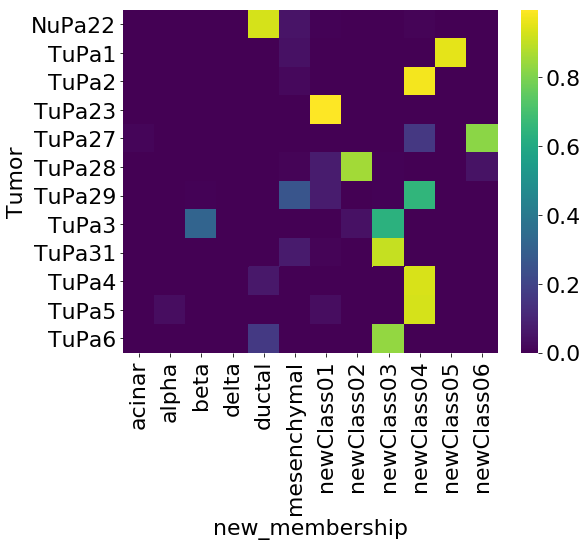

In [340]:
counts_normal = cellTypeOccurrence(tsnedf,TuPa_meta)
f = plt.figure(figsize=(10,7))
sns.heatmap(counts_normal.divide(counts_normal.sum()).fillna(0).T,cmap='viridis')
plt.gcf().subplots_adjust(left=.3,right=0.95,bottom=.2)
f.savefig(savedir+date+'/occurrence_tumor.png')

In [144]:
a.fillna(0).T.to_csv(savedir+date+'/occurrence_tumor.csv')

In [321]:
imp.reload(sam)
kwds['number_of_cells_per_type'] = 20
matrix_sub,annot,annotdict, AA_newmeta,TuPa_meta = sam.normmerge_twoCounttables_subsample(AA_counttable,
                                                                             AA_newmeta, TuPa_counttable, TuPa_meta, **kwds)
matrix_feature_selected_sub = sam.feature_select_sub(matrix_sub.dropna(how='all',axis=1),annot,AA_newmeta,**kwds)
#matrix??


-------------------------------------------
genes to be removed from counttable:
['BIVM-ERCC5', 'ERCC-00002', 'ERCC-00003', 'ERCC-00004', 'ERCC-00009', 'ERCC-00012', 'ERCC-00013', 'ERCC-00014', 'ERCC-00016', 'ERCC-00017', 'ERCC-00019', 'ERCC-00022', 'ERCC-00024', 'ERCC-00025', 'ERCC-00028', 'ERCC-00031', 'ERCC-00033', 'ERCC-00034', 'ERCC-00035', 'ERCC-00039', 'ERCC-00040', 'ERCC-00041', 'ERCC-00042', 'ERCC-00043', 'ERCC-00044', 'ERCC-00046', 'ERCC-00048', 'ERCC-00051', 'ERCC-00053', 'ERCC-00054', 'ERCC-00057', 'ERCC-00058', 'ERCC-00059', 'ERCC-00060', 'ERCC-00061', 'ERCC-00062', 'ERCC-00067', 'ERCC-00069', 'ERCC-00071', 'ERCC-00073', 'ERCC-00074', 'ERCC-00075', 'ERCC-00076', 'ERCC-00077', 'ERCC-00078', 'ERCC-00079', 'ERCC-00081', 'ERCC-00083', 'ERCC-00084', 'ERCC-00085', 'ERCC-00086', 'ERCC-00092', 'ERCC-00095', 'ERCC-00096', 'ERCC-00097', 'ERCC-00098', 'ERCC-00099', 'ERCC-00104', 'ERCC-00108', 'ERCC-00109', 'ERCC-00111', 'ERCC-00112', 'ERCC-00113', 'ERCC-00116', 'ERCC-00117', 'ERCC-00

-------------------------------------------
Cell types in atlas:
['acinar' 'alpha' 'beta' 'delta' 'ductal' 'mesenchymal']
-------------------------------------------
Cell types in new data:
[nan]
-------------------------------------------
120
-------------------------------------------
Selected number of genes from atlas:
600
-------------------------------------------
Selected number of genes from new cells:
20
-------------------------------------------
Combined total of selected genes:
612
-------------------------------------------


In [322]:
kwds['threshold_neigborhood'] = thresn = .8 
kwds['n_pcs'] = n_pcs = 20 
kwds['resolution_parameter'] = respar = .005
tsnedfSU, class_numbersSU,valsSU = sam.semiAnnotate_subsample(matrix_feature_selected_sub,annot,AA_newmeta,TuPa_meta,**kwds)

-------------------------------------------
performing UNweighted PCA
-------------------------------------------
perfoming tSNE
tSNE done.
-------------------------------------------


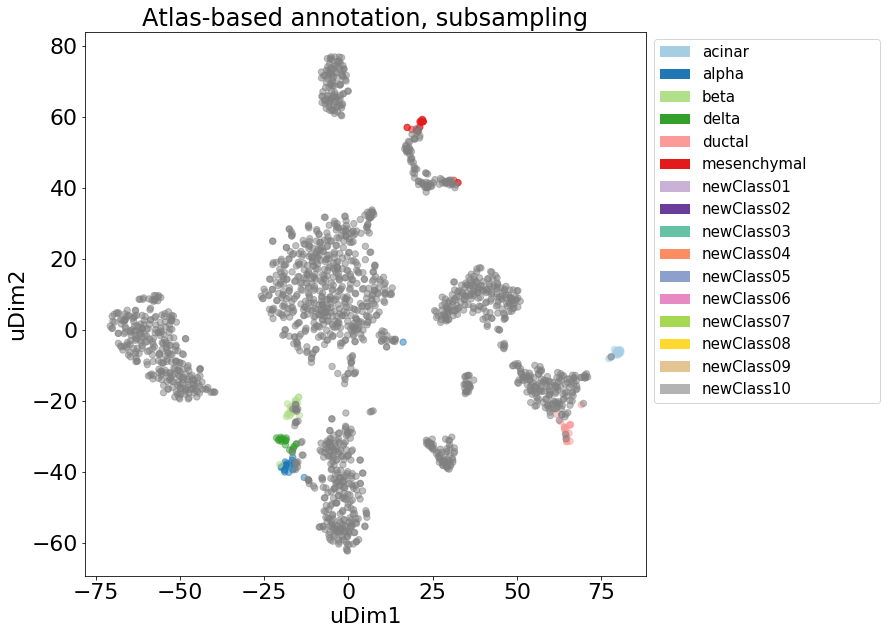

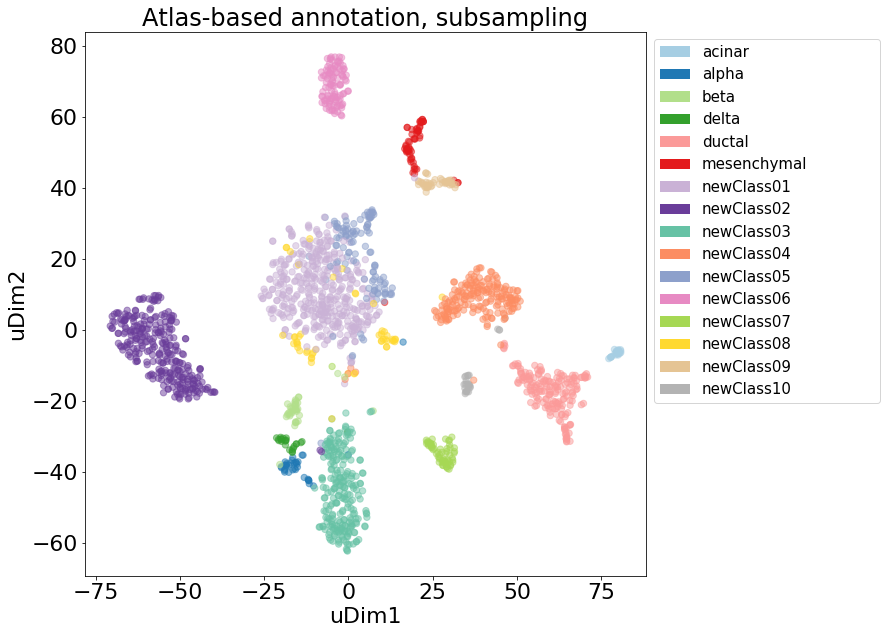

In [323]:
"""if (len(vals)-8) % 2 == 0:
    added_colors = sns.color_palette('BrBG',len(vals)-8)
else:
    all_colors = sns.color_palette('BrBG',len(vals)-7)
    mid = round((len(all_colors)-1)/2)
    added_colors = all_colors[:mid]+all_colors[mid+1:]"""
    
values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]
disc = len(tsnedfSU['class'].unique()) - len(values)
if disc>0:
    values = values + sns.color_palette('Set2',disc)
newlut = dict(zip(valsSU,values))
newcolor = tsnedfSU['original_membership'].map(newlut).fillna('gray')

f,ax = plt.subplots(figsize=(12,10))
tsnedfSU.plot.scatter('uDim1','uDim2',s=40
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,valsSU,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('Atlas-based annotation, subsampling')
#plt.xlim(right=65)
#plt.ylim(bottom=-60)
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/sA_subsampling_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/sA_subsampling_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')

values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]
disc = len(tsnedfSU['class'].unique()) - len(values)
if disc>0:
    values = values + sns.color_palette('Set2',disc)
newlut = dict(zip(valsSU,values))
newcolor = tsnedfSU['new_membership'].map(newlut)#.fillna('gray')

f,ax = plt.subplots(figsize=(12,10))
tsnedfSU.plot.scatter('uDim1','uDim2',s=40
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,valsSU,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('Atlas-based annotation, subsampling')
#plt.xlim(right=65)
#plt.ylim(bottom=-60)
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/sA_subsampling_tSNEcol_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/sA_subsampling_tSNEcol_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')

<Figure size 432x288 with 0 Axes>

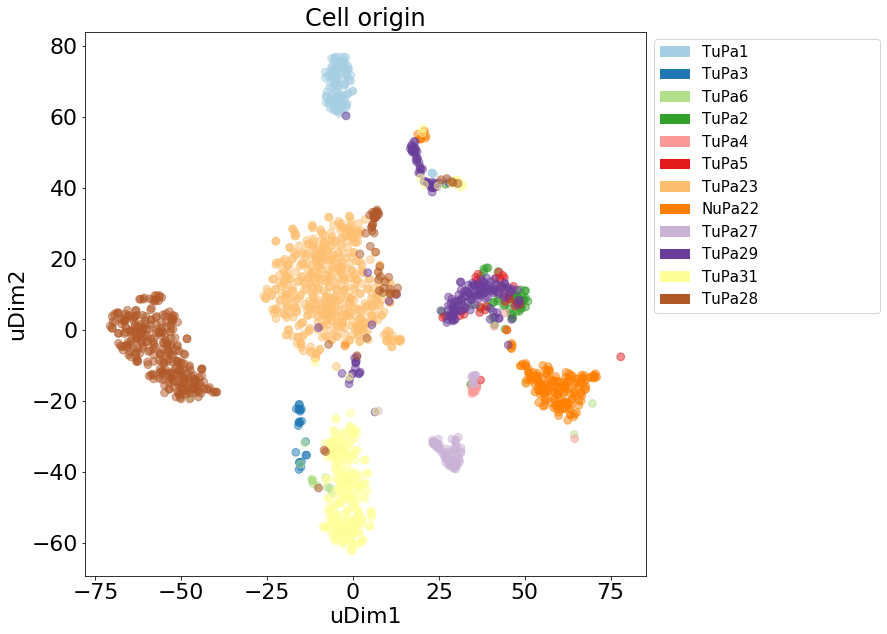

In [324]:
plt.gcf().subplots_adjust(left=.1,right=0.75)
keys = TuPa_meta['Tumor'].unique()
newlut = dict(zip(keys,sns.color_palette('Paired', len(keys))))
newcolor = TuPa_meta['Tumor'].map(newlut)
f,ax = plt.subplots(figsize=(12,10))
tsnedfSU[len(annot):].plot.scatter('uDim1','uDim2',s=60
                    ,alpha=.5,color=newcolor.loc[tsnedfSU[len(annot):].index],ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('Cell origin')
plt.gcf().subplots_adjust(left=.1,right=0.75)
"""plt.ylim(bottom=-60)
16
plt.xlim(right=65)"""
f.savefig(savedir+date+'/TumorPatients_newtSNE_subsam.pdf')
f.savefig(savedir+date+'/TumorPatients_newtSNE_subsam.png')


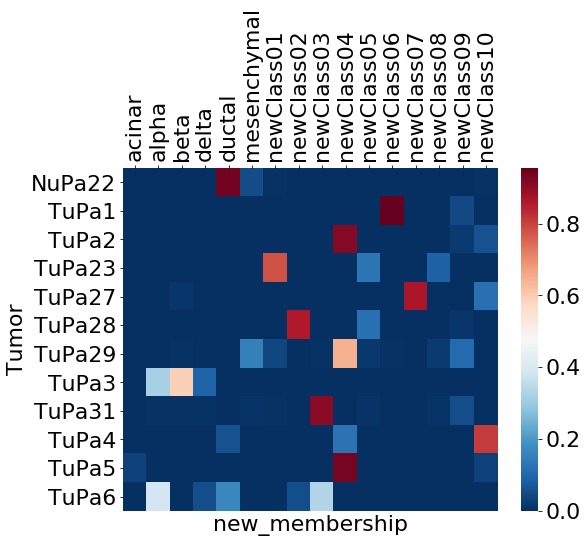

In [347]:
counts_subsamp = cellTypeOccurrence(tsnedfSU,TuPa_meta)
f = plt.figure(figsize=(10,7))
ax = sns.heatmap(counts_subsamp.divide(counts_subsamp.sum()).fillna(0).T,cmap='RdBu_r')
ax.xaxis.set_ticks_position('top')
plt.xticks(rotation=90)
plt.gcf().subplots_adjust(left=.3,right=0.95,bottom=.2)
f.savefig(savedir+date+'/occurrence_tumor_subsamp.png')

In [219]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SAsubsample_top20'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSU20,roSE,coSE,genes_ODSU20,avgSU20 = sdot.make_dotplot(matrix_feature_selected_sub,tsnedfSU,20,**kw)

/home/bojk/Data/minimeta_pyfiles/semiAnnotate_dotplot.py:163: RuntimeWarning: divide by zero encountered in log2
  plt.scatter(xgrid,np.ones(len(xgrid))*i,s=np.log2(temp).multiply(70),alpha=.8)
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [213]:
len(TuPa_meta)

1795

In [156]:
len(matrix_feature_selected_sub.T)

1801

In [157]:
len(matrix.T)

1801

In [158]:
len(matrix_sub.T)

1915

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()


ValueError: 'c' argument has 1813 elements, which is not acceptable for use with 'x' with size 1801, 'y' with size 1801.

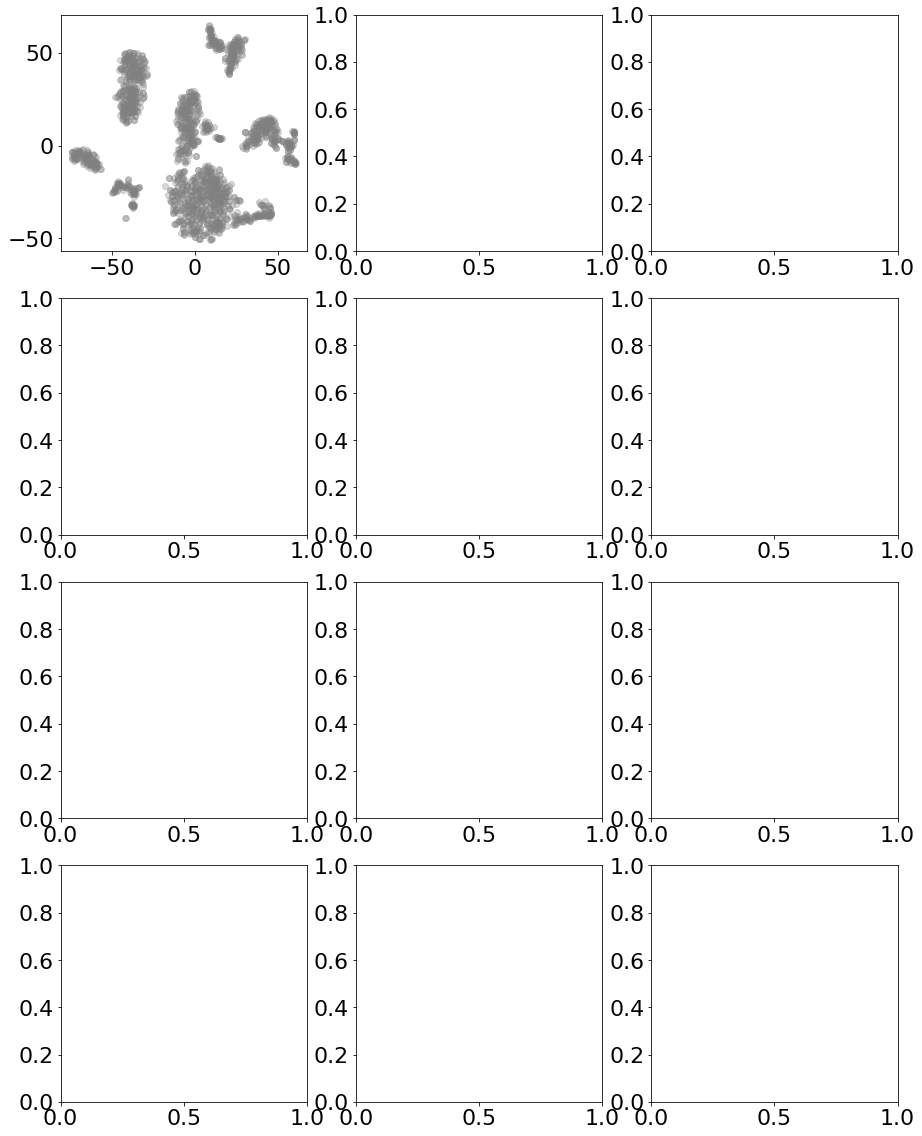

In [ ]:
if (len(vals)-8) % 2 == 0:
    added_colors = sns.color_palette('BrBG',len(vals)-8)
else:
    all_colors = sns.color_palette('BrBG',len(vals)-7)
    mid = round((len(all_colors)-1)/2)
    added_colors = all_colors[:mid]+all_colors[mid+1:]

idx = tsnedf[6:].index
TuPa_meta.loc[idx,'new_membership'] = tsnedf.iloc[6:]['new_membership']
# new results mapped onto old tSNE
newlut = dict(zip(vals,sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired', 10)[8:10]+added_colors))
newcolor = TuPa_meta['new_membership'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/semiAnnotate_noselfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/semiAnnotate_noselfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')

# with self-edging

In [ ]:
#imp.reload(li)
#imp.reload(semiannotate)
kwds['self_edging'] = True
kwds['resolution_parameter'] = respar = .006
tsnedfSE, class_numbersSE,valsSE,wdmSE = sam.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,AA_newmeta,TuPa_meta,**kwds)   

In [ ]:
tsnedfSE['new_membership'].value_counts()
#tsnedfSE['original_membership'].value_counts()

In [ ]:
if (len(valsSE)-8) % 2 == 0:
    added_colors = sns.color_palette('BrBG',len(valsSE)-8)
else:
    all_colors = sns.color_palette('BrBG',len(valsSE)-7)
    mid = round((len(all_colors)-1)/2)
    added_colors = all_colors[:mid]+all_colors[mid+1:]
    
values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+added_colors
newlut = dict(zip(class_numbersSE,values))
newcolor = tsnedfSE['class'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
tsnedfSE.plot.scatter('wDim1','wDim2',s=weights*20
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,valsSE,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
"""plt.ylim(bottom=-60)
plt.xlim(right=65)"""
f.savefig(savedir+date+'/semiAnnotateSE_selfEdges_weightsEq_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/semiAnnotateSE_selfEdges_weightsEq_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')

In [ ]:
if (len(valsSE)-8) % 2 == 0:
    added_colors = sns.color_palette('BrBG',len(valsSE)-8)
else:
    all_colors = sns.color_palette('BrBG',len(valsSE)-7)
    mid = round((len(all_colors)-1)/2)
    added_colors = all_colors[:mid]+all_colors[mid+1:]
    
idx = tsnedf[6:].index
TuPa_meta.loc[idx,'new_membershipSE'] = tsnedfSE.iloc[6:]['new_membership']
# new results mapped onto old tSNE
newlut = dict(zip(valsSE,sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+added_colors))
newcolor = TuPa_meta['new_membershipSE'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/semiAnnotate_selfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/semiAnnotate_selfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')

In [ ]:
keys = ['TuPa3','TuPa6','TuPa2','TuPa4','TuPa5','TuPa1']
values = ['endocrine cancer','endocrine cancer','PDAC','PDAC','PDAC','Desmoplastic']
lut = dict(zip(keys,values))
TuPa_meta['tumTypes'] = TuPa_meta['Tumor'].map(lut)


newlut = dict(zip(list(TuPa_meta['tumTypes'].fillna('other').unique()),sns.color_palette('Dark2', 8)[4:]))
newcolor = TuPa_meta['tumTypes'].fillna('other').map(newlut)

"""f,ax = plt.subplots(figsize=(12,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/known_tumorTypes_oldtSNE.pdf')
"""

temp = tsnedf.join(TuPa_meta.tumTypes)
#values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(class_numbers)-8)
#newlut = dict(zip(class_numbers,values))
#newcolor = tsnedf['class'].map(newlut)
#newlut = dict(zip(list(temp['tumTypes'].fillna('other').unique()),sns.color_palette('Dark2', 4)))
newcolor = temp['tumTypes'].fillna('other').map(newlut)
f,ax = plt.subplots(figsize=(12,10))
temp.plot.scatter('wDim1','wDim2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
"""plt.ylim(bottom=-60)
plt.xlim(right=65)"""
f.savefig(savedir+date+'/known_tumorTypes_newtSNE.pdf')

In [ ]:
temp = tsnedf.join(TuPa_meta.Tumor)
temp = temp[temp['new_membership']!='delta']
temp['new'] = temp['Tumor']
temp['new'] = [lut[f] if f in lut.keys() else f for f in temp['Tumor']]
#values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(class_numbers)-8)
#newlut = dict(zip(class_numbers,values))
#newcolor = tsnedf['class'].map(newlut)
kois = temp['new'].fillna('other').unique()
newlut = dict(zip(kois,sns.color_palette('Paired', len(kois)-2)+sns.color_palette('Dark2',2)))
newcolor = temp['new'].fillna('other').map(newlut)
f,ax = plt.subplots(figsize=(12,10))
temp.plot.scatter('wDim1','wDim2',s=weights[1:]*60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.ylim(bottom=-60)
plt.xlim(right=65)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/tumorPatients_withmerged_newtsne_noDelta.pdf')

In [ ]:
keys = ['TuPa3','TuPa6','TuPa2','TuPa4','TuPa5','TuPa1','NuPa22']
values = ['endocrine cancer','endocrine cancer','PDAC','PDAC','PDAC','Desmoplastic','non-tumor tissue']
lut = dict(zip(keys,values))
TuPa_meta['tumTypes'] = TuPa_meta['Tumor'].map(lut)
temp = tsnedf.join(TuPa_meta.Tumor)
#temp = temp[temp['new_membership']!='delta']
#temp['new'] = temp['Tumor']
temp['new'] = [lut[f] if f in lut.keys() else f for f in temp['Tumor']]
#values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(class_numbers)-8)
#newlut = dict(zip(class_numbers,values))
#newcolor = tsnedf['class'].map(newlut)
kois = temp['new'].fillna('other').unique()
newlut = dict(zip(kois,sns.color_palette('Paired', len(kois)-2)+sns.color_palette('Dark2',2)))
newcolor = temp['new'].fillna('other').map(newlut)
f,ax = plt.subplots(figsize=(12,10))
temp.plot.scatter('wDim1','wDim2',s=weights[:]*60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
"""plt.ylim(bottom=-65)
plt.xlim(right=60)"""
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/tumorPatients_withmerged_newtsne.pdf')


temp = tsnedf.join(TuPa_meta.Tumor)
#temp = temp[temp['new_membership']!='delta']
#temp['new'] = temp['Tumor']
temp['new'] = [lut[f] if f in lut.keys() else f for f in temp['Tumor']]
#values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(class_numbers)-8)
#newlut = dict(zip(class_numbers,values))
#newcolor = tsnedf['class'].map(newlut)
kois = temp['Tumor'].fillna('atlas cells').unique()
newlut = dict(zip(kois,sns.color_palette('Paired', len(kois)-4)+sns.color_palette('Dark2',4)))
newcolor = temp['Tumor'].fillna('atlas cells').map(newlut)
f,ax = plt.subplots(figsize=(12,10))
temp.plot.scatter('wDim1','wDim2',s=weights[:]*60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
"""plt.ylim(bottom=-65)
plt.xlim(right=60)"""
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/tumorPatients_newtsne.pdf')

# check stability - this re-initializes semiAnnotate(!)

In [ ]:
# uses same dict as above

dim = len(matrix_feature_selected.T)
trials = 20
b = c = np.ndarray([trials,dim,dim],np.int32)

ts = tsnedfSE.copy()
for i in range(trials):
    #values = ['Cell_type',30,500,.8,20,respar[i],True]
    
    #ts, class_numSE,valSE,wdmSE= li.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,BA_newmeta,GBM_meta,**kwds)
    ts, class_numSE,valSE = sam.semiAnnotate_using_tsnedf(matrix_feature_selected,weights,AA_newmeta,TuPa_meta,ts,**kwds)
    newdf2 = ts.copy()
    newdf2['class2'] = newdf2['class']+1
    df = pd.pivot_table(newdf2,values='class2',index=newdf2.index,columns='new_membership',aggfunc=np.count_nonzero).fillna(0).copy()                     
    a = df.T.corr().values
    b[i][:][:] = a
    #c[i][:][:] = np.corrcoef(a)

    
average_df = pd.DataFrame(np.average(b,axis=0),index=df.index,columns=df.index)
#average_corr = pd.DataFrame(np.average(c,axis=0),index=df.index,columns=df.index)
drop_idx = average_df[(average_df[average_df==1].sum()==1)].index
stable_pairs = average_df.drop(drop_idx).drop(drop_idx,axis=1)
stablep = stable_pairs[stable_pairs==1].fillna(0)

# select groups with same size as value counts (this avoids me having to perform hierarchical clustering)
idx = stablep.sum().value_counts().index.astype(int)
val = stablep.sum().value_counts().values
df = pd.DataFrame(index=range(len(idx)), columns=['idx','val'])
df['idx'] = idx;df['val'] = val
groups = df[df.eq(df.iloc[:, 0], axis=0).all(1)==True].idx.values

idxs = []
for cluster in groups:
    idxs.append(list(stablep[stablep.sum()==cluster].index))
clusterdict = dict(zip(groups,idxs))

In [ ]:
print(len(groups))
numgr = 20
groupi = groups[:numgr] # take the 11 largest groups


if numgr<=12:
    values = sns.color_palette('Paired',len(groupi))
else:
    values = sns.color_palette('Paired',12)+sns.color_palette('BrBG',numgr-12)
lut = dict(zip(groupi,values))

f,ax = plt.subplots(figsize=(11,10))

tsnedfSE.plot.scatter('wDim1','wDim2',ax=ax,color='k',s=2*20,alpha=.5)
for group in groupi:
    idxes = clusterdict[group]
    tsnedfSE.loc[idxes].plot.scatter('wDim1','wDim2',ax=ax,color=lut[group],s=40,alpha=.6)

for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('stable clusters over '+str(trials)+' rounds of leiden')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.ylim(bottom=-60)
plt.xlim(right=65)
plt.show()
f.savefig(savedir+date+'/semiAnnotateStability_'+str(numgr)+'largestGroups'+date+'.png')
f.savefig(savedir+date+'/semiAnnotateStability_'+str(numgr)+'largestGroups'+date+'.pdf')

In [ ]:
if (len(vals)-8) % 2 == 0:
    added_colors = sns.color_palette('BrBG',len(vals)-8)
else:
    all_colors = sns.color_palette('BrBG',len(vals)-7)
    mid = round((len(all_colors)-1)/2)
    added_colors = all_colors[:mid]+all_colors[mid+1:]
#post stability classes
values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired', 11)[8:10]+sns.color_palette('BrBG',len(valSE)-8)
newlut = dict(zip(valSE,values))
newcolor = ts['new_membership'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
ts.plot.scatter('wDim1','wDim2',s=weights*30
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,valSE,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.ylim(bottom=-60)
plt.xlim(right=65)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/semiAnnotateSE_selfEdges_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'_postStab.png')
f.savefig(savedir+date+'/semiAnnotateSE_selfEdges_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'_postStab.pdf')

idx = tsnedf[6:].index
TuPa_meta.loc[idx,'new_membershipSE_postStab'] = ts.iloc[6:]['new_membership']
# new results mapped onto old tSNE
newlut = dict(zip(valSE,sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(valSE)-8)))
newcolor = TuPa_meta['new_membershipSE_postStab'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)

f.savefig(savedir+date+'/semiAnnotate_selfEdges_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'_postStab.png')
f.savefig(savedir+date+'/semiAnnotate_selfEdges_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'_postStab.pdf')

In [ ]:
matrix_feature_selected.to_csv(savedir+date+'/feature_selected_matrix_'+date+'.csv')
TuPa_meta.to_csv(savedir+date+'/new_cells_metadata_'+date+'.csv')
tsnedf.to_csv(savedir+date+'/tsnedf_noselfEdging_'+date+'.csv')
tsnedfSE.to_csv(savedir+date+'/tsnedf_selfEdging_'+date+'.csv')
ts.to_csv(savedir+date+'/tsnedf_selfEdging_postStab_'+date+'.csv')

In [ ]:
cluster_pair_df = sam.make_pairdf(1-average_df,2,ts)

In [ ]:
cluster_pair_df#.correlation.sort_values()
#pairs_wSE_95 = li.make_pairs(pd.DataFrame(wdmSE),.05,5)
#olors = sns.color_palette('RdBu_r',5)
f,ax = plt.subplots(figsize=(10,10))
ts.plot.scatter('wDim1','wDim2',figsize=(10,10),ax=ax,alpha=.05,color='gray')
for pair in cluster_pair_df.index:
    xy1 = ts.loc[cluster_pair_df.loc[pair,0]][['wDim1','wDim2']]
    xy2 = ts.loc[cluster_pair_df.loc[pair,1]][['wDim1','wDim2']]
    #corr = pairdf.loc[pair,'correlation']
    ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.05
            ,c='r')

#plt.yticks([]);plt.xticks([])
plt.xlabel('tSNE1'),plt.ylabel('tSNE2')
plt.title('Nearest semiAnnotate neighbors')

plt.gcf().subplots_adjust(right=0.8,bottom=.2)
plt.ylim(top=75)
plt.show()
f.savefig(savedir+date+'/brain_edges_clusterCorr_tsne'+date+'.png')
f.savefig(savedir+date+'/brain_edges_clusterCorr_tsne'+date+'.pdf')

In [ ]:
"""tsnedfSE
newlut
keys = list(tsnedfSE[:6].index)+list(set(tsnedfSE.iloc[6:]['original_membership']).difference(set(tsnedfSE[:6].index)))
values = sns.color_palette('Paired',12)+sns.color_palette('BrBG',len(keys)-12)
keys = TuPa_meta['celltypes'].value_counts().index;values=sns.color_palette('Paired',len(keys))

lut = dict(zip(keys,values))
colors = tsnedfSE[6:].original_membership.map(lut)

f = plt.figure(figsize=(11,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
tsnedfSE[6:].plot.scatter('wDim1','wDim2',ax=ax,color=colors,s=40,alpha=.3)#,label=colors.keys)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Original annotation, tSNE from weighted PCA containing atlas')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.ylim(top=75)

plt.show()
f.savefig(savedir+date+'/tSNE_weightedPCA_originalAnnotation.png')
f.savefig(savedir+date+'/tSNE_weightedPCA_originalAnnotation.pdf')"""

# plot edge length vs correlation as scatter
# colored by inter or intra class edge 

In [ ]:
wdmSEdf = pd.DataFrame(wdmSE)
pairdf = sam.make_pairdf(wdmSEdf,5,ts)

In [ ]:
pairdf.head()

In [ ]:
pairdf.edge_type.value_counts()

In [ ]:
lut = {'inter_class':'orange','intra_class':'gray'}
cols = pairdf['edge_type'].map(lut)
f,ax = plt.subplots()
pairdf[pairdf['edge_type'].str.contains('inter')].plot.scatter('edge_length','distance',alpha=.2,figsize=(7,7),color='orange',label='inter-class edge',ax=ax)
pairdf[pairdf['edge_type'].str.contains('intra')].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color='gray',label='intra-class edge',ax=ax)
plt.yscale('log');plt.xscale('log')
plt.ylim(.0001,1.2)
plt.xlim(.0001,100)
plt.title('5 nearest neighbor edges')
plt.gcf().subplots_adjust(left=0.2,bottom=.2)
f.savefig(savedir+date+'/dist_edgelength.png')
f.savefig(savedir+date+'/dist_edgelength.pdf')

In [ ]:
#lut = {'inter_class':'orange','intra_class':'gray'}
#cols = pairdf['edge_type'].map(lut)
colors = sns.color_palette('RdBu_r',5)
f,ax = plt.subplots()
pairdf[pairdf['correlation']<.8].plot.scatter('edge_length','distance',alpha=.2,figsize=(7,7),color=colors[0],label='<80%',ax=ax)
pairdf[(pairdf['correlation']<.9)&(pairdf['correlation']>=.8)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[1],label='80-90%',ax=ax)
pairdf[(pairdf['correlation']<.95)&(pairdf['correlation']>=.9)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[2],label='90-95%',ax=ax)
pairdf[(pairdf['correlation']<.99)&(pairdf['correlation']>=.95)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[3],label='95-99%',ax=ax)
pairdf[pairdf['correlation']>=.99].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[4],label='>=99%',ax=ax)
plt.yscale('log');plt.xscale('log')
plt.ylim(.0001,1.2)
plt.xlim(.0001,100)
plt.title('5 nearest neighbor edges')
plt.gcf().subplots_adjust(left=0.2,bottom=.2)
f.savefig(savedir+date+'/dist_edgelength_corrcol.png')
f.savefig(savedir+date+'/dist_edgelength_corrcol.pdf')

# plot edges colored by correlation

In [ ]:
#pairs_wSE_95 = li.make_pairs(pd.DataFrame(wdmSE),.05,5)
colors = sns.color_palette('RdBu_r',5)
f,ax = plt.subplots(figsize=(10,10))
tsnedf.plot.scatter('wDim1','wDim2',figsize=(10,10),ax=ax,alpha=.05,color='gray')
for pair in pairdf.index:
    xy1 = tsnedfSE.iloc[pairdf.loc[pair,0]][['wDim1','wDim2']]
    xy2 = tsnedfSE.iloc[pairdf.loc[pair,1]][['wDim1','wDim2']]
    corr = pairdf.loc[pair,'correlation']
    if corr<.8:
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[0])
    elif (corr>=.8) & (corr<.9):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[1])
    elif (corr>=.9) & (corr<.95):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[2])
    elif (corr>=.95) & (corr<.99):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[3])
    elif corr>=.99:
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[4])
#
#plt.yticks([]);plt.xticks([])
handles = ['<80%','80-90%','90-95%','95-99%','>99%']
labs = [f for f in colors]
dictcorr = dict(zip(handles,labs))
for x,y in dictcorr.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handle, labels = ax.get_legend_handles_labels()
    

plt.xlabel('tSNE1'),plt.ylabel('tSNE2')
plt.title('Correlation 5 nearest neighbors')
plt.legend(handle,handles, bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.gcf().subplots_adjust(right=0.8,bottom=.2)
plt.show()
f.savefig(savedir+date+'/brain_edges_corr_tsne'+date+'.png')
f.savefig(savedir+date+'/brain_edges_corr_tsne'+date+'.pdf')

# Sankey diagram plotting

In [ ]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_selfEgdes_'+date
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
sank.sankey_BB(ts[6:],**kw)

In [ ]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_NOselfEgdes_'+date
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
sank.sankey_BB(tsnedf[6:],**kw)

# Dot plot creation

In [ ]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top5'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD5,avg3 = sdot.make_dotplot(matrix_feature_selected,ts,5,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top10'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE1,roSE,coSE,genes_OD10,avg3 = sdot.make_dotplot(matrix_feature_selected,ts,10,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top15'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD15,avg3 = sdot.make_dotplot(matrix_feature_selected,ts,15,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top20'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD20,avg3 = sdot.make_dotplot(matrix_feature_selected,ts,20,**kw)

In [ ]:
imp.reload(sdot)
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top3'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD5,avg3 = sdot.make_dotplot(matrix_feature_selected,tsnedfSE,3,**kw)
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_NoSelfEgdes_top3'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD5,avg3 = sdot.make_dotplot(matrix_feature_selected,tsnedf,3,**kw)
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_NoSelfEgdes_top5'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))

genePanelSE,roSE,coSE,genes_OD5,avg5 = sdot.make_dotplot(matrix_feature_selected,tsnedf,5,**kw)

In [ ]:
"""keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top1'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanel1,roSE,coSE,genes_OD1,avg1 = sdot.make_dotplot(matrix_feature_selected,tsnedf,1,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top2'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanel2,roSE,coSE,genes_OD2,avg2 = sdot.make_dotplot(matrix_feature_selected,tsnedf,2,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top3'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanel3,roSE,coSE,genes_OD3,avg3 = sdot.make_dotplot(matrix_feature_selected,tsnedf,3,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top5'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanel5,roSE,coSE,genes_OD5,avg3 = sdot.make_dotplot(matrix_feature_selected,tsnedf,5,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top10'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanel10,roSE,coSE,genes_OD10,avg3 = sdot.make_dotplot(matrix_feature_selected,tsnedf,10,**kw)
"""
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdesSE_top20'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanel20,roSE,coSE,genes_OD20,avg20 = sdot.make_dotplot(matrix_feature_selected,tsnedf,20,**kw)

In [ ]:
from scipy.spatial.distance import squareform
cols = genes_OD5.columns.sort_values()
index = genes_OD5[cols[0]]
for celltype in cols[1:]:
    index = index.append(genes_OD5[celltype]).reset_index(drop=True)

In [ ]:
genePanelSE.loc['INS']

In [ ]:
imp.reload(sdot)
alpha = ['GCG','LOXL4','PLCE1','IRX2','GC','KLHL41','CRYBA2','TM4SF4','RGS4']
beta = ['INS','IAPP','MAFA','NPTX2','DLK1','ADCYAP1','PFKFB2','PDX1','TGFBR3','SYT13']
delta = ['SST','PRG4','LEPR','RBP4','BCHE','HHEX','FRZB','PCSK1','RGS2','GABRG2']
KOLS = ['alpha','beta','delta']
a,b,c,avg_exp_matrix = sdot.make_top_genes(matrix_feature_selected,tsnedf,'new_membership',5)

In [ ]:
genes_OD5

In [ ]:
avg_exp_matrix.loc[alpha+beta+delta]

In [ ]:
a,b,c,avg_exp_matrix_all = sdot.make_top_genes(matrix,tsnedf,'new_membership',5)
avg_exp_matrix_all.loc[alpha+beta+delta]

In [ ]:
genes_OD20

In [ ]:
#idx = tsnedf[6:].index
#$TuPa_meta.loc[idx,'new_membership'] = tsnedf.iloc[6:]['new_membership']
# new results mapped onto old tSNE
newlut = dict(zip(vals,sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired', 10)[8:10]+sns.color_palette('BrBG',len(vals)-8)))
newcolor = TuPa_meta['new_membership'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)


values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(class_numbers)-8)
newlut = dict(zip(class_numbers,values))
newcolor = tsnedf['class'].map(newlut)
f,ax = plt.subplots(figsize=(12,10))
tsnedf.plot.scatter('wDim1','wDim2',s=weights*40
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels1 = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)